## Social Media and Network Analytics
#### Anjana Karathat Rajeev

In [2]:
%load_ext autoreload
%autoreload 1
%aimport redditClient
%aimport RedditProcessing

In [3]:
import json
import pandas as pd
with open('job.json', 'r') as f:
    data = json.load(f)

# Create a DataFrame from the loaded dictionary
df = pd.DataFrame.from_dict(data['submission'])

df.head()

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments
0,Success and Disappointment Megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,This is the weekly success and disappointment...,1.686524e+09,1.00,[{'Top Comments': 'Success: I FINALLY GOT AN O...
1,Success and Disappointment Megathread for the ...,AutoModerator,1,9,https://www.reddit.com/r/jobs/comments/178rkxd...,This is the weekly success and disappointment...,1.697411e+09,1.00,[{'Top Comments': 'I landed a new job finally!...
2,Are people really applying to 30+ jobs a day?,Central_Therapy,104,68,https://www.reddit.com/r/jobs/comments/179iqrs...,"For context, I'm a somewhat recent college gra...",1.697495e+09,0.96,[{'Top Comments': 'Depends on the day. Some da...
3,"""Team-bonding"" events should only be held duri...",DatingAdviceGiver101,130,11,https://www.reddit.com/r/jobs/comments/179c2ob...,I hate when companies schedule these events af...,1.697479e+09,0.97,"[{'Top Comments': 'At my job, we handle it thu..."
4,My parents think remote job = not a real job,peanutalmondyum,7885,1956,https://www.reddit.com/r/jobs/comments/178oc6d...,I just told my parents that I finally got a jo...,1.697402e+09,0.94,[{'Top Comments': 'People who don’t understand...


### Summary Statistics

Text(0.5, 1.0, 'Distribution of score')

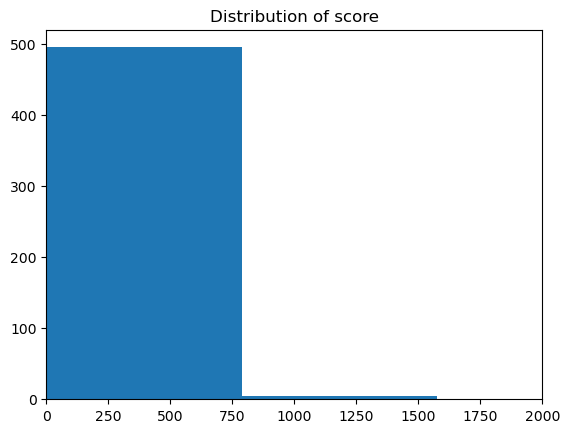

In [4]:
import matplotlib.pyplot as plt
plt.hist(df['Score'])
plt.xlim(0, 2000)
plt.title('Distribution of score')

Text(0.5, 1.0, 'Distribution of Upvote ratio')

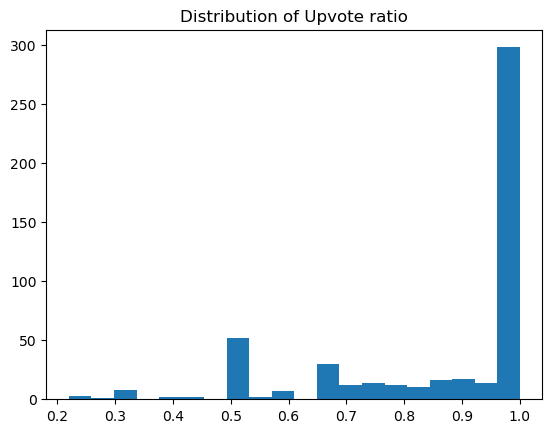

In [5]:
plt.hist(df['upvoteration'],bins=20)
#plt.xlim(0, 200)
plt.title('Distribution of Upvote ratio')

In [6]:
idx = df['upvoteration'].idxmax()
df.loc[idx]

Title                 Success and Disappointment Megathread for the ...
Author                                                    AutoModerator
Score                                                                91
Number of Comments                                                  300
URL                   https://www.reddit.com/r/jobs/comments/1478752...
Self Text              This is the weekly success and disappointment...
Timestamp                                                  1686524412.0
upvoteration                                                        1.0
Top Comments          [{'Top Comments': 'Success: I FINALLY GOT AN O...
Name: 0, dtype: object

In [7]:
print("Title:",df.loc[idx]['Title'],"\nSelf Text:",df.loc[idx]['Self Text'],"\nUpvote Ratio:", df.loc[idx]['upvoteration'])

Title: Success and Disappointment Megathread for the Week 
Self Text:  This is the weekly success and disappointment Megathread for the week. Please post all of your successes and disappointments for this week, including job offers and other victories, as well as any venting of frustration, in this thread, and this thread only. Thanks! 
Upvote Ratio: 1.0


In [8]:
idx = df['Score'].idxmax()
df.loc[idx]

Title                      My parents think remote job = not a real job
Author                                                  peanutalmondyum
Score                                                              7885
Number of Comments                                                 1956
URL                   https://www.reddit.com/r/jobs/comments/178oc6d...
Self Text             I just told my parents that I finally got a jo...
Timestamp                                                  1697401997.0
upvoteration                                                       0.94
Top Comments          [{'Top Comments': 'People who don’t understand...
Name: 4, dtype: object

In [9]:
print("Title:",df.loc[idx]['Title'],"\nSelf Text:",df.loc[idx]['Self Text'],"\nUpvote Ratio:", df.loc[idx]['upvoteration'])

Title: My parents think remote job = not a real job 
Self Text: I just told my parents that I finally got a job offer (after a year of unemployment since graduation)

They were so disappointed and said "REMOTE??? So you are not actually going to the office? What kind of company is that? Is even that a real job? You will be chillin sitting in front of the desk at HOME??? gosh..."

I currently live with them and planning to move out anyways. (+ Edit: btw ive been already paying them a rent (through a part time job) and helping them a lot with chores and stuff. And they will be charging me the median rent $$$ in this area for the bedroom from now on until I move out. They are high income earners and not financially struggling or anything. Just wanted to say that I am not living here for free.) But I thought they would tell me congratulations first.. lol

Told them it's a small company and showed them an offer letter. They got even more disappointed. 
Upvote Ratio: 0.94


In [10]:
idx = df['Number of Comments'].idxmax()
df.loc[idx]

Title                      My parents think remote job = not a real job
Author                                                  peanutalmondyum
Score                                                              7885
Number of Comments                                                 1956
URL                   https://www.reddit.com/r/jobs/comments/178oc6d...
Self Text             I just told my parents that I finally got a jo...
Timestamp                                                  1697401997.0
upvoteration                                                       0.94
Top Comments          [{'Top Comments': 'People who don’t understand...
Name: 4, dtype: object

In [11]:
df['Top Comments'] = df['Top Comments'].apply(lambda x: x[0]['Top Comments'] if x and isinstance(x, list) and len(x) > 0 and 'Top Comments' in x[0] else '')

In [12]:
df.head()

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments
0,Success and Disappointment Megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,This is the weekly success and disappointment...,1.686524e+09,1.00,Success: I FINALLY GOT AN OFFER! 3 months into...
1,Success and Disappointment Megathread for the ...,AutoModerator,1,9,https://www.reddit.com/r/jobs/comments/178rkxd...,This is the weekly success and disappointment...,1.697411e+09,1.00,I landed a new job finally! Working from home ...
2,Are people really applying to 30+ jobs a day?,Central_Therapy,104,68,https://www.reddit.com/r/jobs/comments/179iqrs...,"For context, I'm a somewhat recent college gra...",1.697495e+09,0.96,"Depends on the day. Some days I send out 3-4, ..."
3,"""Team-bonding"" events should only be held duri...",DatingAdviceGiver101,130,11,https://www.reddit.com/r/jobs/comments/179c2ob...,I hate when companies schedule these events af...,1.697479e+09,0.97,"At my job, we handle it thus: there are requir..."
4,My parents think remote job = not a real job,peanutalmondyum,7885,1956,https://www.reddit.com/r/jobs/comments/178oc6d...,I just told my parents that I finally got a jo...,1.697402e+09,0.94,People who don’t understand the capabilities o...


#### Removing special characters

In [13]:
import re
df["Title"] = df["Title"].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df["Self Text"] = df["Self Text"].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df["Top Comments"] = df["Top Comments"].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

#### Converting to lowercase and tokenizing the title and the content text

In [14]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Convert text to lowercase
df["Title"] = df["Title"].str.lower()
df["Self Text"] = df["Self Text"].str.lower()
df["Top Comments"] = df["Top Comments"].str.lower()

# Tokenize text
df["tokenized_title"] = df["Title"].apply(word_tokenize)
df["tokenized_text"] = df["Self Text"].apply(word_tokenize)
df["tokenized_comments"] = df["Top Comments"].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANJANA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Removing stopwords

In [15]:
lPunct = ['.', ',', ';', ':', '!', '?', '"', "'", '-']
lStopwords = nltk.corpus.stopwords.words('english') + lPunct + ['via']

In [16]:
df['tokenized_title_no_stopwords'] = df['tokenized_title'].apply(lambda tokens: [word for word in tokens if word.lower() not in lStopwords])
df['tokenized_text_no_stopwords'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word.lower() not in lStopwords])
df['tokenized_comments_no_stopwords'] = df['tokenized_comments'].apply(lambda tokens: [word for word in tokens if word.lower() not in lStopwords])

In [17]:
df

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords
0,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[success, i, finally, got, an, offer, 3, month...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[success, finally, got, offer, 3, months, job,..."
1,success and disappointment megathread for the ...,AutoModerator,1,9,https://www.reddit.com/r/jobs/comments/178rkxd...,this is the weekly success and disappointment...,1.697411e+09,1.00,i landed a new job finally working from home f...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[i, landed, a, new, job, finally, working, fro...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[landed, new, job, finally, working, home, ban..."
2,are people really applying to 30 jobs a day,Central_Therapy,104,68,https://www.reddit.com/r/jobs/comments/179iqrs...,for context im a somewhat recent college gradu...,1.697495e+09,0.96,depends on the day some days i send out 34 som...,"[are, people, really, applying, to, 30, jobs, ...","[for, context, im, a, somewhat, recent, colleg...","[depends, on, the, day, some, days, i, send, o...","[people, really, applying, 30, jobs, day]","[context, im, somewhat, recent, college, gradu...","[depends, day, days, send, 34, days, get, like..."
3,teambonding events should only be held during ...,DatingAdviceGiver101,130,11,https://www.reddit.com/r/jobs/comments/179c2ob...,i hate when companies schedule these events af...,1.697479e+09,0.97,at my job we handle it thus there are required...,"[teambonding, events, should, only, be, held, ...","[i, hate, when, companies, schedule, these, ev...","[at, my, job, we, handle, it, thus, there, are...","[teambonding, events, held, working, hours]","[hate, companies, schedule, events, working, h...","[job, handle, thus, required, events, get, pai..."
4,my parents think remote job not a real job,peanutalmondyum,7885,1956,https://www.reddit.com/r/jobs/comments/178oc6d...,i just told my parents that i finally got a jo...,1.697402e+09,0.94,people who dont understand the capabilities of...,"[my, parents, think, remote, job, not, a, real...","[i, just, told, my, parents, that, i, finally,...","[people, who, dont, understand, the, capabilit...","[parents, think, remote, job, real, job]","[told, parents, finally, got, job, offer, year...","[people, dont, understand, capabilities, techn..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,been ghosted on remote job interviews trying t...,RelevantClock8883,1,8,https://www.reddit.com/r/jobs/comments/177fht4...,im a 3d modeler with a masters in architecture...,1.697251e+09,0.60,this is definitely a question for the aec sub ...,"[been, ghosted, on, remote, job, interviews, t...","[im, a, 3d, modeler, with, a, masters, in, arc...","[this, is, definitely, a, question, for, the, ...","[ghosted, remote, job, interviews, trying, thi...","[im, 3d, modeler, masters, architecture, desig...","[definitely, question, aec, sub, youre, niche,..."
496,i got payed less but dont know if i should fil...,sweetandicey,4,4,https://www.reddit.com/r/jobs/comments/1775ypg...,i had recently quit my last job about 2 weeks ...,1.697223e+09,1.00,thats illegal file a claim if they dont give y...,"[i, got, payed, less, but, dont, know, if, i, ...","[i, had, recently, quit, my, last, job, about,...","[thats, illegal, file, a, claim, if, they, don...","[got, payed, less, dont, know,

#### Convert time stamp to date

In [18]:
# Convert the timestamp column to a datetime format
df['datetime'] = pd.to_datetime(df['Timestamp'], unit='s')

In [19]:
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [20]:
df

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,datetime,date,time
0,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[success, i, finally, got, an, offer, 3, month...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[success, finally, got, offer, 3, months, job,...",2023-06-11 23:00:12,2023-06-11,23:00:12
1,success and disappointment megathread for the ...,AutoModerator,1,9,https://www.reddit.com/r/jobs/comments/178rkxd...,this is the weekly success and disappointment...,1.697411e+09,1.00,i landed a new job finally working from home f...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[i, landed, a, new, job, finally, working, fro...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[landed, new, job, finally, working, home, ban...",2023-10-15 23:00:12,2023-10-15,23:00:12
2,are people really applying to 30 jobs a day,Central_Therapy,104,68,https://www.reddit.com/r/jobs/comments/179iqrs...,for context im a somewhat recent college gradu...,1.697495e+09,0.96,depends on the day some days i send out 34 som...,"[are, people, really, applying, to, 30, jobs, ...","[for, context, im, a, somewhat, recent, colleg...","[depends, on, the, day, some, days, i, send, o...","[people, really, applying, 30, jobs, day]","[context, im, somewhat, recent, college, gradu...","[depends, day, days, send, 34, days, get, like...",2023-10-16 22:29:11,2023-10-16,22:29:11
3,teambonding events should only be held during ...,DatingAdviceGiver101,130,11,https://www.reddit.com/r/jobs/comments/179c2ob...,i hate when companies schedule these events af...,1.697479e+09,0.97,at my job we handle it thus there are required...,"[teambonding, events, should, only, be, held, ...","[i, hate, when, companies, schedule, these, ev...","[at, my, job, we, handle, it, thus, there, are...","[teambonding, events, held, working, hours]","[hate, companies, schedule, events, working, h...","[job, handle, thus, required, events, get, pai...",2023-10-16 17:51:15,2023-10-16,17:51:15
4,my parents think remote job not a real job,peanutalmondyum,7885,1956,https://www.reddit.com/r/jobs/comments/178oc6d...,i just told my parents that i finally got a jo...,1.697402e+09,0.94,people who dont understand the capabilities of...,"[my, parents, think, remote, job, not, a, real...","[i, just, told, my, parents, that, i, finally,...","[people, who, dont, understand, the, capabilit...","[parents, think, remote, job, real, job]","[told, parents, finally, got, job, offer, year...","[people, dont, understand, capabilities, techn...",2023-10-15 20:33:17,2023-10-15,20:33:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,been ghosted on remote job interviews trying t...,RelevantClock8883,1,8,https://www.reddit.com/r/jobs/comments/177fht4...,im a 3d modeler with a masters in architecture...,1.697251e+09,0.60,this is definitely a question for the aec sub ...,"[been, ghosted, on, remote, job, interviews, t...","[im, a, 3d, modeler, with, a, masters, in, arc...","[this, is, definitely, a, question, for, the, ...","[ghosted, remote, job, interviews, trying, thi...","[im, 3d, modeler, masters, architecture, desig...","[definitely, question, aec, sub, youre, niche,...",2023-10-14 02:39:00,2023-10-14,02:39:00
496,i got payed less but dont know if i should fil...,sweetandicey,4,4,https://www.reddit.com/r/jobs/comments/1775ypg...,i had recently quit my last job ab

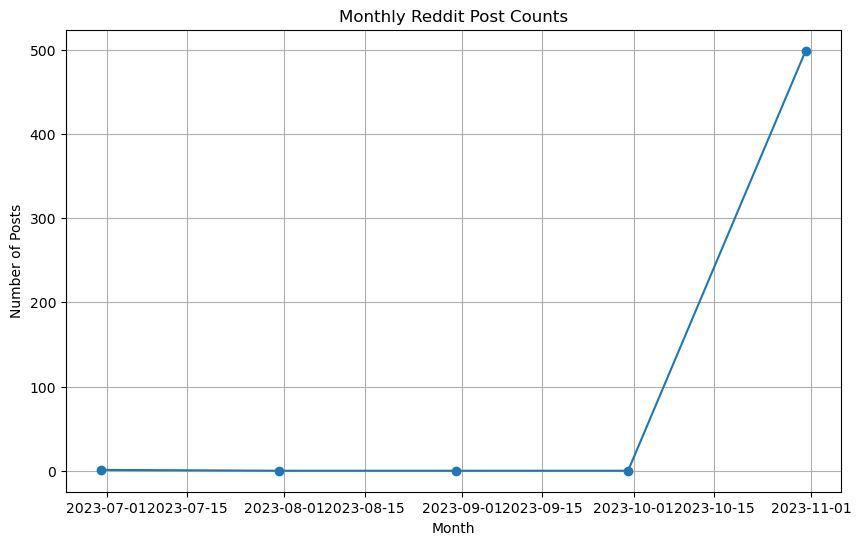

In [21]:
df.set_index('datetime', inplace=True)

# Group by month and count the number of posts
monthly_post_counts = df.resample('M').size()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_post_counts.index, monthly_post_counts.values, marker='o')
plt.title('Monthly Reddit Post Counts')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.grid()
plt.show()

In [22]:
df['datetime'] = pd.to_datetime(df['Timestamp'], unit='s')
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time

In [23]:
df.head()

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime
datetime,,,,,,,,,,,,,,,,,,
2023-06-11 23:00:12,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[success, i, finally, got, an, offer, 3, month...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[success, finally, got, offer, 3, months, job,...",2023-06-11,23:00:12,2023-06-11 23:00:12
2023-10-15 23:00:12,success and disappointment megathread for the ...,AutoModerator,1,9,https://www.reddit.com/r/jobs/comments/178rkxd...,this is the weekly success and disappointment...,1.697411e+09,1.00,i landed a new job finally working from home f...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[i, landed, a, new, job, finally, working, fro...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[landed, new, job, finally, working, home, ban...",2023-10-15,23:00:12,2023-10-15 23:00:12
2023-10-16 22:29:11,are people really applying to 30 jobs a day,Central_Therapy,104,68,https://www.reddit.com/r/jobs/comments/179iqrs...,for context im a somewhat recent college gradu...,1.697495e+09,0.96,depends on the day some days i send out 34 som...,"[are, people, really, applying, to, 30, jobs, ...","[for, context, im, a, somewhat, recent, colleg...","[depends, on, the, day, some, days, i, send, o...","[people, really, applying, 30, jobs, day]","[context, im, somewhat, recent, college, gradu...","[depends, day, days, send, 34, days, get, like...",2023-10-16,22:29:11,2023-10-16 22:29:11
2023-10-16 17:51:15,teambonding events should only be held during ...,DatingAdviceGiver101,130,11,https://www.reddit.com/r/jobs/comments/179c2ob...,i hate when companies schedule these events af...,1.697479e+09,0.97,at my job we handle it thus there are required...,"[teambonding, events, should, only, be, held, ...","[i, hate, when, companies, schedule, these, ev...","[at, my, job, we, handle, it, thus, there, are...","[teambonding, events, held, working, hours]","[hate, companies, schedule, events, working, h...","[job, handle, thus, required, events, get, pai...",2023-10-16,17:51:15,2023-10-16 17:51:15
2023-10-15 20:33:17,my parents think remote job not a real job,peanutalmondyum,7885,1956,https://www.reddit.com/r/jobs/comments/178oc6d...,i just told my parents that i finally got a jo...,1.697402e+09,0.94,people who dont understand the capabilities of...,"[my, parents, think, remote, job, not, a, real...","[i, just, told, my, parents, that, i, finally,...","[people, who, dont, understand, the, capabilit...","[parents, think, remote, job, real, job]","[told, parents, finally, got, job, offer, year...","[people, dont, understand, capabilities, techn...",2023-10-15,20:33:17,2023-10-15 20:33:17


#### Cleaning results

In [24]:
from collections import Counter
import matplotlib.pyplot as plt
token_counter = Counter(token for tokens in df['tokenized_text'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'this': 618, 'is': 695, 'the': 2215, 'weekly': 11, 'success': 11, 'and': 2092, 'disappointment': 3, 'megathread': 2, 'for': 1100, 'week': 127, 'please': 29, 'post': 27, 'all': 201, 'of': 1047, 'your': 96, 'successes': 2, 'disappointments': 2, 'including': 17, 'job': 762, 'offers': 26, 'other': 121, 'victories': 2, 'as': 362, 'well': 88, 'any': 216, 'venting': 5, 'frustration': 2, 'in': 1089, 'thread': 5, 'only': 136, 'thanks': 48, 'context': 16, 'im': 621, 'a': 2094, 'somewhat': 6, 'recent': 16, 'college': 39, 'graduate': 5, 'whos': 6, 'trying': 47, 'to': 2320, 'break': 24, 'into': 95, 'biotech': 1, 'industry': 27, 'like': 294, 'lot': 67, 'people': 143, 'sub': 5, 'ive': 294, 'been': 321, 'hunting': 14, 'while': 76, 'i': 3337, 'have': 700, 'wet': 1, 'lab': 3, 'animal': 1, 'research': 21, 'experience': 145, 'so': 433, 'didnt': 73, 'think': 86, 'it': 677, 'would': 278, 'take': 83, 'long': 59, 'land': 9, 'an': 329, 'entrylevel': 10, 'being': 84, 'longtime': 1, 'lurker': 2, 'lve': 1, 'real

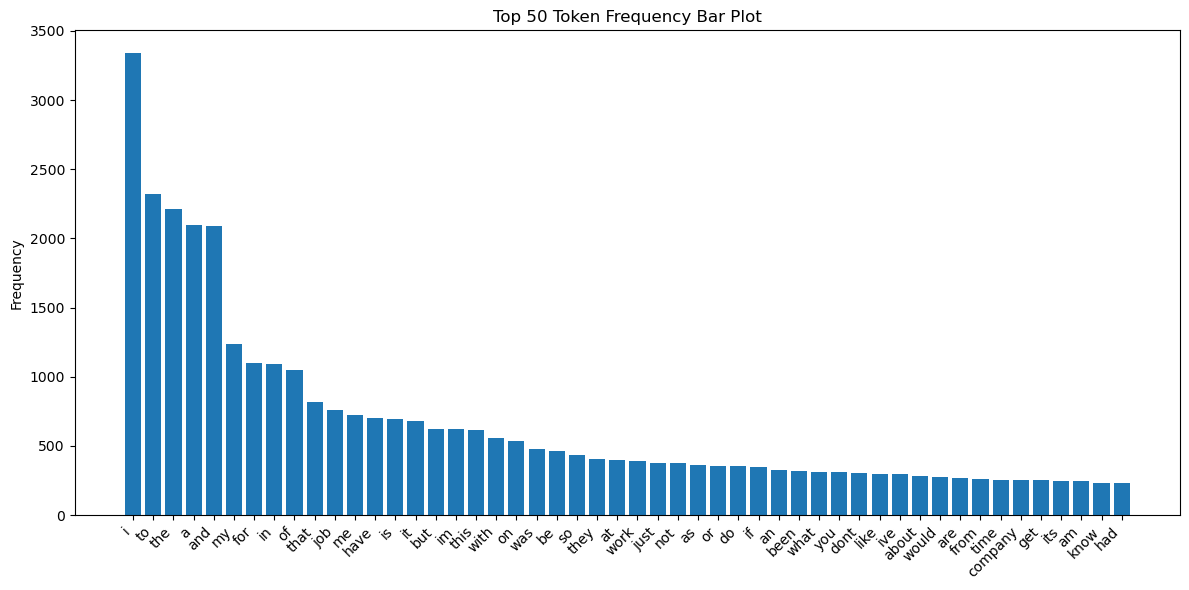

In [25]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [26]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_text_no_stopwords'] for token in tokens)
token_frequency = dict(token_counter)
print(token_frequency)

{'weekly': 11, 'success': 11, 'disappointment': 3, 'megathread': 2, 'week': 127, 'please': 29, 'post': 27, 'successes': 2, 'disappointments': 2, 'including': 17, 'job': 762, 'offers': 26, 'victories': 2, 'well': 88, 'venting': 5, 'frustration': 2, 'thread': 5, 'thanks': 48, 'context': 16, 'im': 621, 'somewhat': 6, 'recent': 16, 'college': 39, 'graduate': 5, 'whos': 6, 'trying': 47, 'break': 24, 'biotech': 1, 'industry': 27, 'like': 294, 'lot': 67, 'people': 143, 'sub': 5, 'ive': 294, 'hunting': 14, 'wet': 1, 'lab': 3, 'animal': 1, 'research': 21, 'experience': 145, 'didnt': 73, 'think': 86, 'would': 278, 'take': 83, 'long': 59, 'land': 9, 'entrylevel': 10, 'longtime': 1, 'lurker': 2, 'lve': 1, 'realized': 10, 'common': 15, '250': 3, 'applications': 29, 'deep': 3, 'averaging': 2, '23': 7, 'jobs': 198, 'day': 91, 'sometimes': 13, 'linkedins': 1, 'easy': 15, 'apply': 53, 'option': 18, 'seen': 14, 'read': 12, '30': 16, 'something': 116, 'start': 56, 'also': 154, 'worth': 26, 'unemployed': 

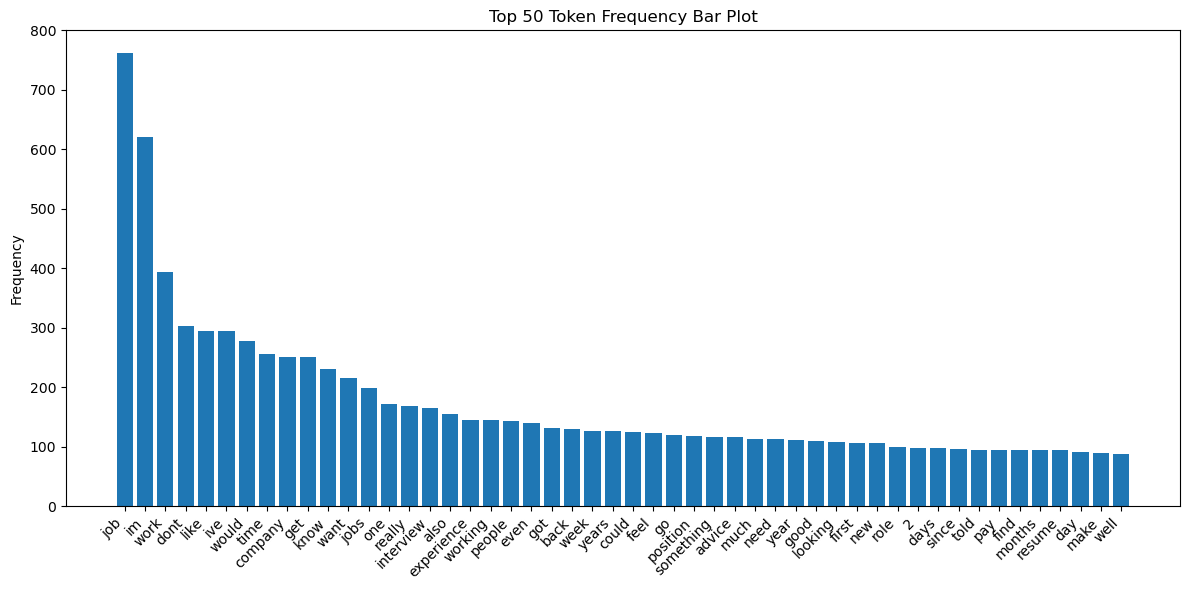

In [27]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [28]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_title'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'success': 3, 'and': 60, 'disappointment': 2, 'megathread': 2, 'for': 90, 'the': 70, 'week': 9, 'are': 16, 'people': 13, 'really': 5, 'applying': 15, 'to': 158, '30': 1, 'jobs': 49, 'a': 185, 'day': 8, 'teambonding': 1, 'events': 1, 'should': 34, 'only': 5, 'be': 18, 'held': 1, 'during': 2, 'working': 15, 'hours': 5, 'my': 69, 'parents': 2, 'think': 5, 'remote': 16, 'job': 157, 'not': 19, 'real': 3, 'help': 16, 'i': 142, 'accidentally': 2, 'took': 2, 'two': 5, 'at': 30, 'same': 3, 'time': 12, 'arent': 1, 'matching': 1, 'cost': 1, 'of': 47, 'living': 2, 'got': 11, 'fired': 9, 'today': 5, 'after': 24, 'how': 62, 'likely': 2, 'am': 14, 'get': 32, 'missing': 1, 'meeting': 2, 'thats': 1, 'flipping': 1, 'it': 32, 'unemployment': 1, 'rant': 1, 'do': 51, 'over': 7, 'almost': 3, 'being': 4, 'what': 56, 'easiest': 1, 'noweekendnonight': 1, 'linkedin': 7, 'is': 60, 'bad': 12, 'actually': 5, 'terrible': 2, 'finding': 5, 'work': 38, 'who': 8, 'dont': 12, 'like': 12, 'old': 4, 'company': 15, 'looki

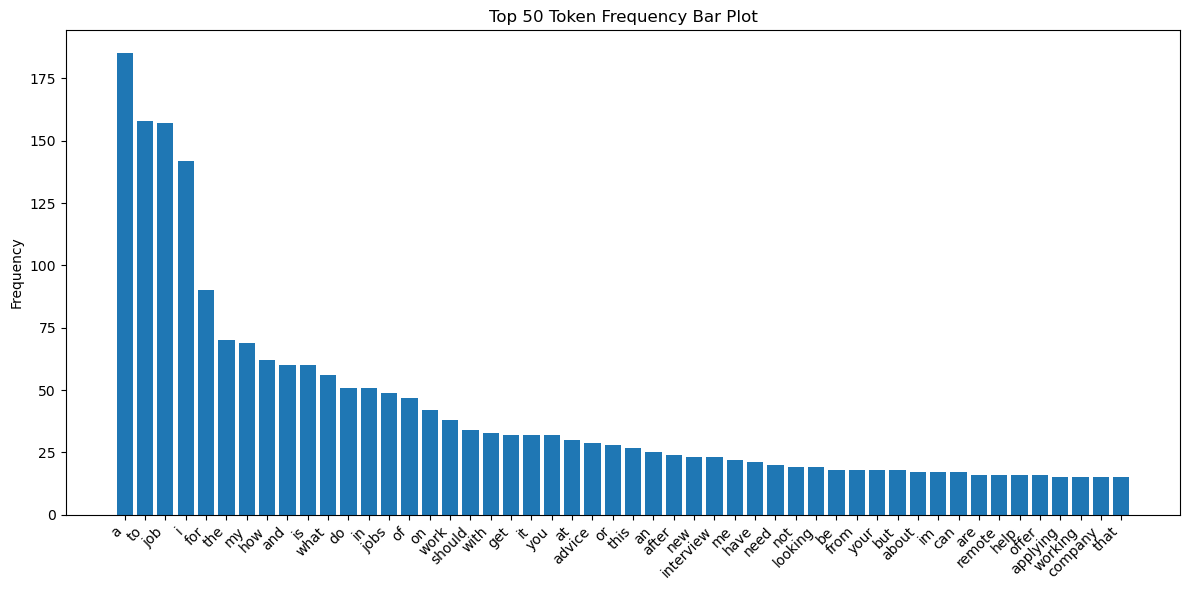

In [29]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [30]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_title_no_stopwords'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'success': 3, 'disappointment': 2, 'megathread': 2, 'week': 9, 'people': 13, 'really': 5, 'applying': 15, '30': 1, 'jobs': 49, 'day': 8, 'teambonding': 1, 'events': 1, 'held': 1, 'working': 15, 'hours': 5, 'parents': 2, 'think': 5, 'remote': 16, 'job': 157, 'real': 3, 'help': 16, 'accidentally': 2, 'took': 2, 'two': 5, 'time': 12, 'arent': 1, 'matching': 1, 'cost': 1, 'living': 2, 'got': 11, 'fired': 9, 'today': 5, 'likely': 2, 'get': 32, 'missing': 1, 'meeting': 2, 'thats': 1, 'flipping': 1, 'unemployment': 1, 'rant': 1, 'almost': 3, 'easiest': 1, 'noweekendnonight': 1, 'linkedin': 7, 'bad': 12, 'actually': 5, 'terrible': 2, 'finding': 5, 'work': 38, 'dont': 12, 'like': 12, 'old': 4, 'company': 15, 'looking': 19, 'rehire': 1, 'top': 2, 'sales': 3, 'rep': 1, 'admitting': 1, 'letting': 1, 'go': 7, 'wo': 1, 'cause': 1, 'right': 6, 'answer': 4, 'much': 6, 'would': 12, 'rate': 1, 'skill': 3, 'scale': 1, '10': 1, 'hate': 2, 'eating': 1, 'lunch': 2, 'colleagues': 1, 'hiring': 7, 'normal': 4

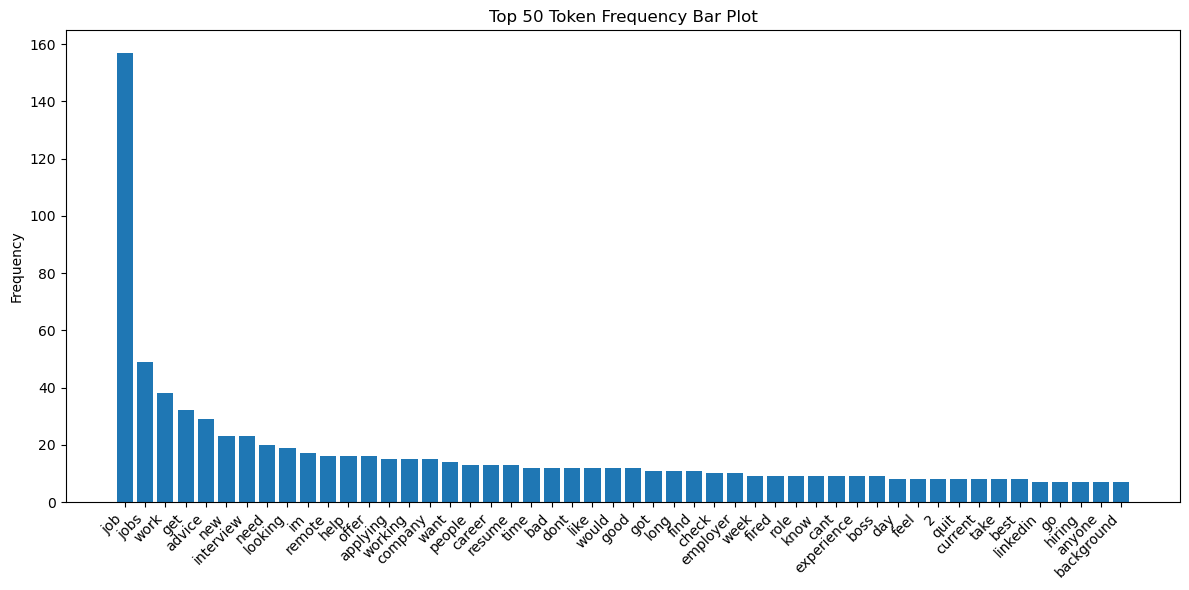

In [31]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))

top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [32]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_comments'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'success': 3, 'i': 394, 'finally': 2, 'got': 23, 'an': 97, 'offer': 18, '3': 14, 'months': 13, 'into': 32, 'my': 113, 'job': 188, 'search': 11, 'post': 6, 'layoff': 2, 'much': 32, 'better': 37, 'pay': 21, 'and': 521, 'a': 646, 'title': 7, 'bump': 2, 'im': 49, 'not': 139, 'getting': 21, 'deported': 1, 'am': 18, 'so': 80, 'relieved': 1, 'cries': 1, 'for': 299, 'all': 50, 'the': 580, 'visa': 2, 'holders': 1, 'out': 100, 'there': 66, 'have': 160, 'faith': 1, 'in': 297, 'yourself': 17, 'if': 200, 'you': 691, 'could': 39, 'get': 107, 'employer': 18, 'to': 752, 'sponsor': 2, 'your': 277, 'once': 9, 'before': 20, 'can': 117, 'find': 38, 'another': 15, 'one': 51, 'who': 55, 'will': 56, 'landed': 1, 'new': 39, 'working': 34, 'from': 49, 'home': 19, 'bank': 3, 'know': 51, 'itll': 4, 'be': 179, 'hard': 23, 'work': 129, 'but': 133, 'happy': 9, 'ill': 4, 'day': 20, 'free': 3, 'awful': 2, 'place': 19, 'now': 28, 'even': 51, 'every': 14, 'customer': 7, 'on': 156, 'phone': 8, 'is': 223, 'asshole': 1, 

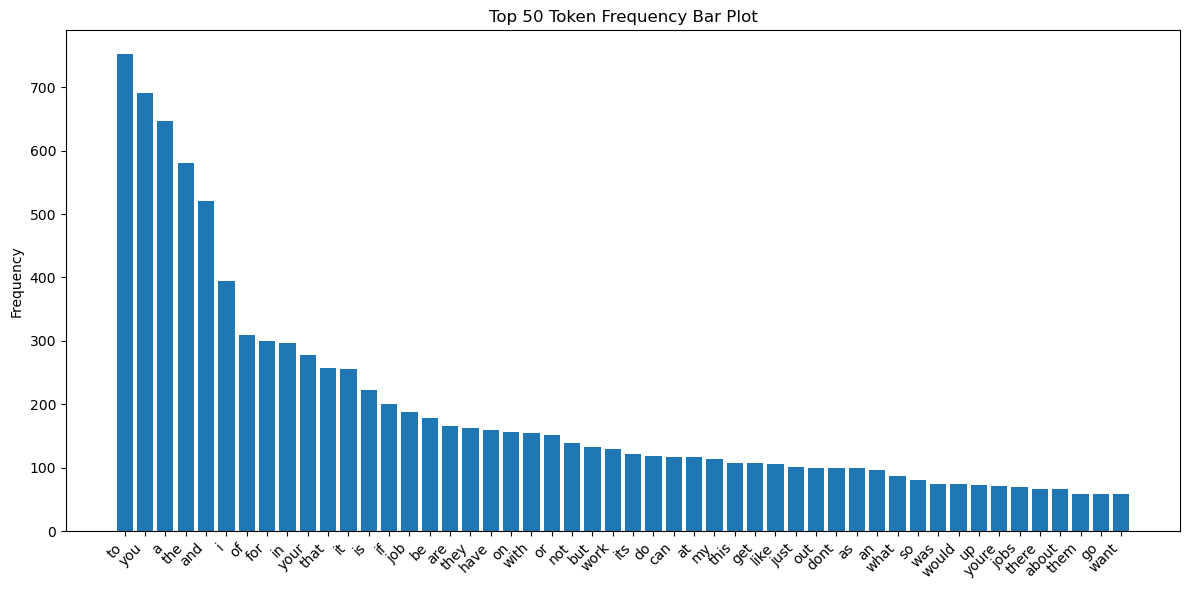

In [33]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))
top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [34]:
from collections import Counter
token_counter = Counter(token for tokens in df['tokenized_comments_no_stopwords'] for token in tokens)

token_frequency = dict(token_counter)

print(token_frequency)

{'success': 3, 'finally': 2, 'got': 23, 'offer': 18, '3': 14, 'months': 13, 'job': 188, 'search': 11, 'post': 6, 'layoff': 2, 'much': 32, 'better': 37, 'pay': 21, 'title': 7, 'bump': 2, 'im': 49, 'getting': 21, 'deported': 1, 'relieved': 1, 'cries': 1, 'visa': 2, 'holders': 1, 'faith': 1, 'could': 39, 'get': 107, 'employer': 18, 'sponsor': 2, 'find': 38, 'another': 15, 'one': 51, 'landed': 1, 'new': 39, 'working': 34, 'home': 19, 'bank': 3, 'know': 51, 'itll': 4, 'hard': 23, 'work': 129, 'happy': 9, 'ill': 4, 'day': 20, 'free': 3, 'awful': 2, 'place': 19, 'even': 51, 'every': 14, 'customer': 7, 'phone': 8, 'asshole': 1, 'still': 29, 'mental': 8, 'health': 9, 'improve': 4, 'away': 5, 'genuinly': 1, 'depends': 9, 'days': 15, 'send': 11, '34': 1, 'like': 106, '15': 3, 'dont': 99, 'type': 6, 'stuff': 14, 'rejected': 2, 'many': 25, 'times': 6, 'need': 41, 'step': 4, 'computer': 3, 'handle': 3, 'thus': 1, 'required': 3, 'events': 2, 'paid': 14, 'usually': 12, 'associated': 3, 'event': 2, 'te

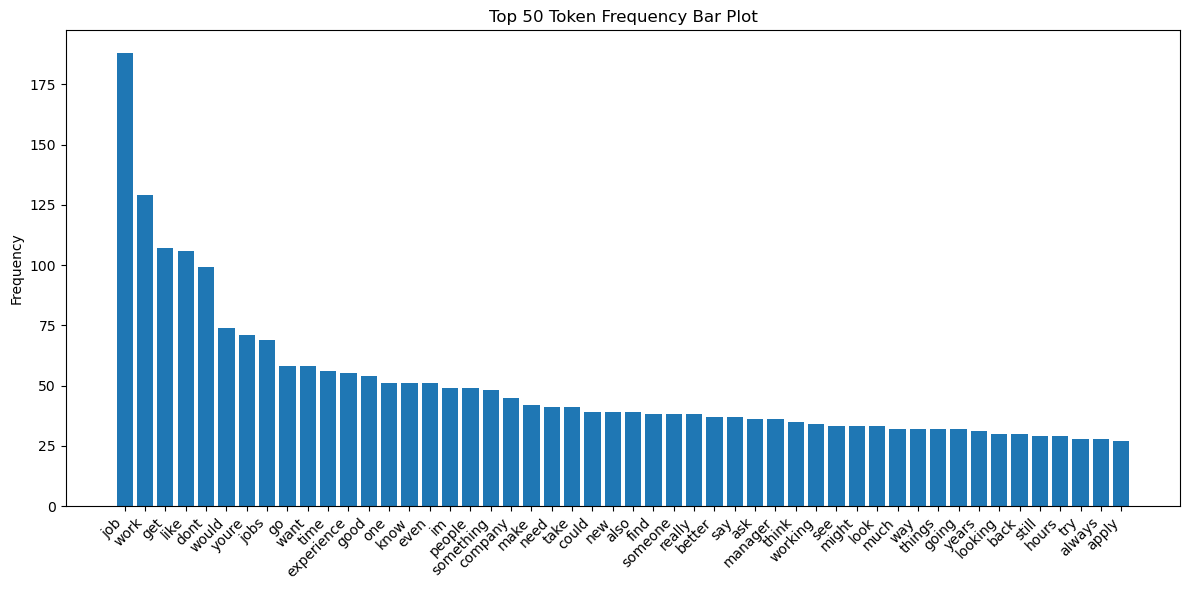

In [35]:
sorted_token_frequency = dict(sorted(token_frequency.items(), key=lambda item: item[1], reverse=True))

top_tokens = list(sorted_token_frequency.keys())[:50]
top_frequencies = list(sorted_token_frequency.values())[:50]

plt.figure(figsize=(12, 6))
plt.bar(top_tokens, top_frequencies)
plt.ylabel('Frequency')
plt.title('Top 50 Token Frequency Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

### Sentiment Analysis

In [36]:
#Initially i am defining the functions for calculating the number of positve and negative words and then finally computing the sentiment by subtracting the positive and negative count

In [37]:
# input file of set of postive words
posWordFile = 'positive-words.txt'
# input file of set of negative words
negWordFile = 'negative-words.txt'
# load set of positive words
lPosWords = []
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    for sLine in fPos:
        lPosWords.append(sLine.strip())

setPosWords = set(lPosWords)

# load set of negative words
lNegWords = []
with open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    for sLine in fNeg:
        lNegWords.append(sLine.strip())

setNegWords = set(lNegWords)

In [38]:
def computeSentiment(lTokens, setPosWords, setNegWords):
    posNum = len([tok for tok in lTokens if tok in setPosWords])
    negNum = len([tok for tok in lTokens if tok in setNegWords])
    sentiment = posNum - negNum
    return sentiment


In [39]:
from colorama import Fore, Back, Style
def printColouredTokens(lTokens, setPosWords, setNegWords, sentiment):
    for token in lTokens:
        if token in setPosWords:
            print(Fore.RED + token + ', ', end='')
        elif token in setNegWords:
            print(Fore.BLUE + token + ', ', end='')
        else:
            print(Style.RESET_ALL + token + ', ', end='')

    print(': {}'.format(sentiment))
    

##### Calculating the sentiment for post title 

In [40]:
for index, row in df.iterrows():
    text = row['tokenized_title_no_stopwords']
    sentiment = computeSentiment(text, setPosWords, setNegWords)

    printColouredTokens(text, setPosWords, setNegWords, sentiment)
    df.loc[index, 'sentiment_title'] = sentiment 

df.head()

success, disappointment, megathread, week, : 0
success, disappointment, megathread, week, : 0
people, really, applying, 30, jobs, day, : 0
teambonding, events, held, working, hours, : 0
parents, think, remote, job, real, job, : 0
help, accidentally, took, two, jobs, time, : 0
jobs, arent, matching, cost, living, : 0
got, fired, today, week, working, : 0
help, likely, get, fired, missing, meeting, : 0
thats, flipping, unemployment, rant, : -1
get, almost, fired, : 0
easiest, noweekendnonight, jobs, get, : 1
linkedin, bad, actually, terrible, finding, work, : -1
jobs, people, dont, like, people, : 1
old, company, looking, rehire, top, sales, rep, admitting, letting, go, wo, cause, : 1
right, answer, much, would, rate, skill, scale, 10, : 2
hate, eating, lunch, colleagues, : -1
jobs, actually, hiring, right, : 1
normal, : 0
3, interviews, 6, people, 135, minutes, seem, like, overkill, accounting, role, : 0
difficult, time, getting, hired, : -1
get, job, container, ship, : 0
fired, recruit

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title
datetime,,,,,,,,,,,,,,,,,,,
2023-06-11 23:00:12,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[success, i, finally, got, an, offer, 3, month...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[success, finally, got, offer, 3, months, job,...",2023-06-11,23:00:12,2023-06-11 23:00:12,0.0
2023-10-15 23:00:12,success and disappointment megathread for the ...,AutoModerator,1,9,https://www.reddit.com/r/jobs/comments/178rkxd...,this is the weekly success and disappointment...,1.697411e+09,1.00,i landed a new job finally working from home f...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[i, landed, a, new, job, finally, working, fro...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[landed, new, job, finally, working, home, ban...",2023-10-15,23:00:12,2023-10-15 23:00:12,0.0
2023-10-16 22:29:11,are people really applying to 30 jobs a day,Central_Therapy,104,68,https://www.reddit.com/r/jobs/comments/179iqrs...,for context im a somewhat recent college gradu...,1.697495e+09,0.96,depends on the day some days i send out 34 som...,"[are, people, really, applying, to, 30, jobs, ...","[for, context, im, a, somewhat, recent, colleg...","[depends, on, the, day, some, days, i, send, o...","[people, really, applying, 30, jobs, day]","[context, im, somewhat, recent, college, gradu...","[depends, day, days, send, 34, days, get, like...",2023-10-16,22:29:11,2023-10-16 22:29:11,0.0
2023-10-16 17:51:15,teambonding events should only be held during ...,DatingAdviceGiver101,130,11,https://www.reddit.com/r/jobs/comments/179c2ob...,i hate when companies schedule these events af...,1.697479e+09,0.97,at my job we handle it thus there are required...,"[teambonding, events, should, only, be, held, ...","[i, hate, when, companies, schedule, these, ev...","[at, my, job, we, handle, it, thus, there, are...","[teambonding, events, held, working, hours]","[hate, companies, schedule, events, working, h...","[job, handle, thus, required, events, get, pai...",2023-10-16,17:51:15,2023-10-16 17:51:15,0.0
2023-10-15 20:33:17,my parents think remote job not a real job,peanutalmondyum,7885,1956,https://www.reddit.com/r/jobs/comments/178oc6d...,i just told my parents that i finally got a jo...,1.697402e+09,0.94,people who dont understand the capabilities of...,"[my, parents, think, remote, job, not, a, real...","[i, just, told, my, parents, that, i, finally,...","[people, who, dont, understand, the, capabilit...","[parents, think, remote, job, real, job]","[told, parents, finally, got, job, offer, year...","[people, dont, understand, capabilities, techn...",2023-10-15,20:33:17,2023-10-15 20:33:17,0.0


In [41]:
df.head()

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title
datetime,,,,,,,,,,,,,,,,,,,
2023-06-11 23:00:12,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[success, i, finally, got, an, offer, 3, month...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[success, finally, got, offer, 3, months, job,...",2023-06-11,23:00:12,2023-06-11 23:00:12,0.0
2023-10-15 23:00:12,success and disappointment megathread for the ...,AutoModerator,1,9,https://www.reddit.com/r/jobs/comments/178rkxd...,this is the weekly success and disappointment...,1.697411e+09,1.00,i landed a new job finally working from home f...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[i, landed, a, new, job, finally, working, fro...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[landed, new, job, finally, working, home, ban...",2023-10-15,23:00:12,2023-10-15 23:00:12,0.0
2023-10-16 22:29:11,are people really applying to 30 jobs a day,Central_Therapy,104,68,https://www.reddit.com/r/jobs/comments/179iqrs...,for context im a somewhat recent college gradu...,1.697495e+09,0.96,depends on the day some days i send out 34 som...,"[are, people, really, applying, to, 30, jobs, ...","[for, context, im, a, somewhat, recent, colleg...","[depends, on, the, day, some, days, i, send, o...","[people, really, applying, 30, jobs, day]","[context, im, somewhat, recent, college, gradu...","[depends, day, days, send, 34, days, get, like...",2023-10-16,22:29:11,2023-10-16 22:29:11,0.0
2023-10-16 17:51:15,teambonding events should only be held during ...,DatingAdviceGiver101,130,11,https://www.reddit.com/r/jobs/comments/179c2ob...,i hate when companies schedule these events af...,1.697479e+09,0.97,at my job we handle it thus there are required...,"[teambonding, events, should, only, be, held, ...","[i, hate, when, companies, schedule, these, ev...","[at, my, job, we, handle, it, thus, there, are...","[teambonding, events, held, working, hours]","[hate, companies, schedule, events, working, h...","[job, handle, thus, required, events, get, pai...",2023-10-16,17:51:15,2023-10-16 17:51:15,0.0
2023-10-15 20:33:17,my parents think remote job not a real job,peanutalmondyum,7885,1956,https://www.reddit.com/r/jobs/comments/178oc6d...,i just told my parents that i finally got a jo...,1.697402e+09,0.94,people who dont understand the capabilities of...,"[my, parents, think, remote, job, not, a, real...","[i, just, told, my, parents, that, i, finally,...","[people, who, dont, understand, the, capabilit...","[parents, think, remote, job, real, job]","[told, parents, finally, got, job, offer, year...","[people, dont, understand, capabilities, techn...",2023-10-15,20:33:17,2023-10-15 20:33:17,0.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2023-06-11 23:00:12 to 2023-10-14 01:52:56
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Title                            500 non-null    object        
 1   Author                           500 non-null    object        
 2   Score                            500 non-null    int64         
 3   Number of Comments               500 non-null    int64         
 4   URL                              500 non-null    object        
 5   Self Text                        500 non-null    object        
 6   Timestamp                        500 non-null    float64       
 7   upvoteration                     500 non-null    float64       
 8   Top Comments                     500 non-null    object        
 9   tokenized_title                  500 non-null    object        
 10  tokenized_text           

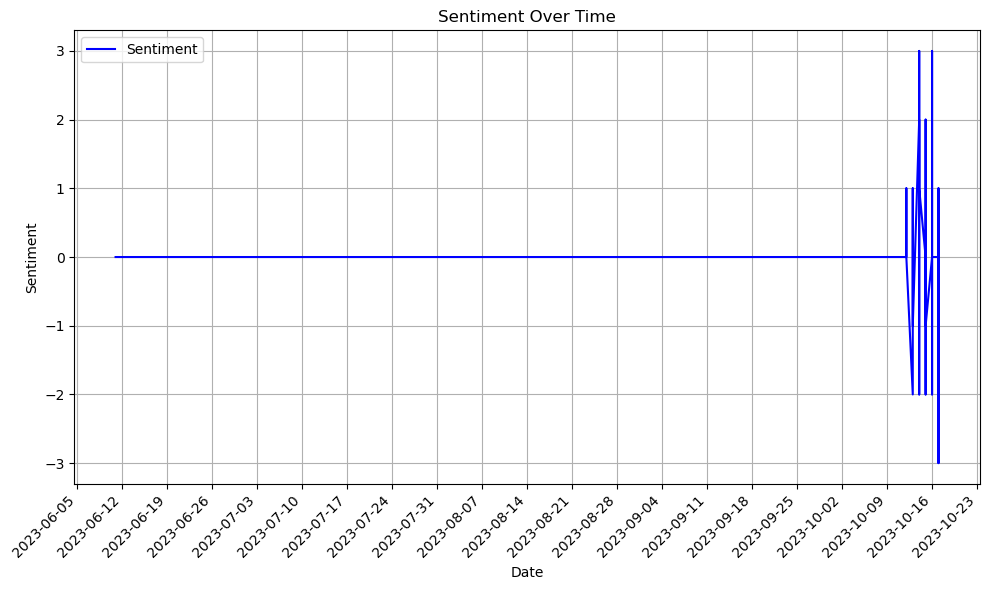

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = df.sort_values(by='date')
plt.figure(figsize=(10, 6))

# Plot the date using the 'date' column and set the sentiment on the y-axis
plt.plot(df['date'], df['sentiment_title'], color='b', label='Sentiment')

# Configure the x-axis to display the date range evenly
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))  # Display every 7 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the date as needed

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


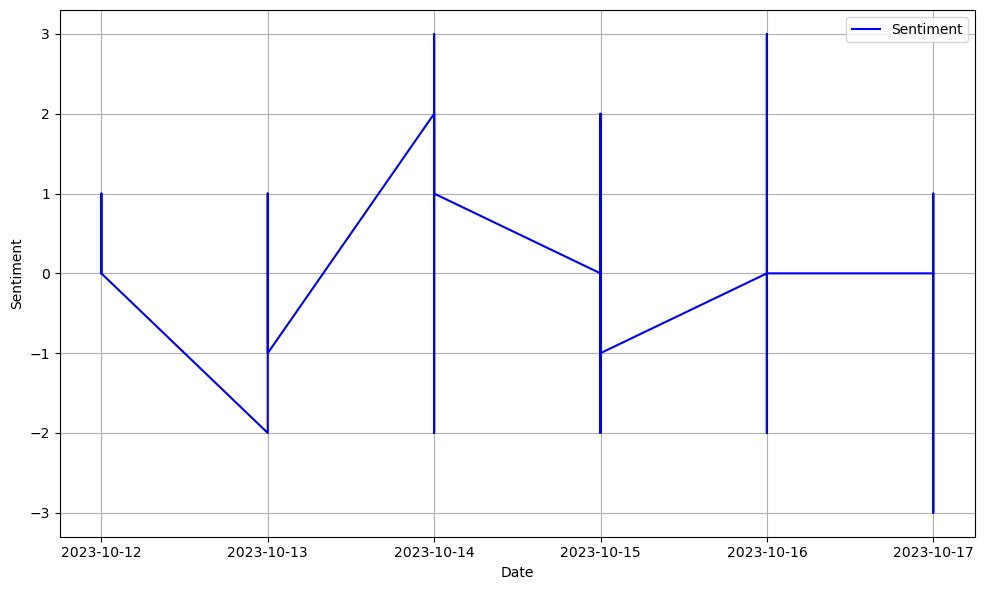

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with a 'date' column
# Convert the 'date' column to a datetime object (if not already)
df['date'] = pd.to_datetime(df['date'])

# Specify the month and year you want to plot
target_month = 10  # Replace with the month you want (e.g., 7 for July)

# Filter the DataFrame to include only data for the target month
target_data = df[df['date'].dt.month == target_month]

plt.figure(figsize=(10, 6))
plt.plot(target_data['date'], target_data['sentiment_title'], color='b', label='Sentiment')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


##### Calculating the sentiment for the post content

In [45]:
for index, row in df.iterrows():
    text = row['tokenized_text_no_stopwords']
    sentiment = computeSentiment(text, setPosWords, setNegWords)
    printColouredTokens(text, setPosWords, setNegWords, sentiment)
    df.loc[index, 'sentiment'] = sentiment = sentiment


df.head()

weekly, success, disappointment, megathread, week, please, post, successes, disappointments, week, including, job, offers, victories, well, venting, frustration, thread, thread, thanks, : 0
hi, im, looking, wfh, jobs, pay, 30hour, including, require, degrees, please, share, jobs, : 0
used, separate, cubicles, recently, company, changed, layout, theres, 5, us, sharing, one, small, area, call, bull, pens, bull, pen, one, coworkers, uses, speaker, phone, never, picks, handset, wouldnt, much, issue, except, joins, online, meetings, still, uses, speaker, expects, everyone, around, dead, silent, work, usually, involves, discussing, matters, coworkers, others, pen, tried, telling, simply, use, handset, instead, insists, respect, thing, silent, ideas, solve, someone, idea, printing, phone, etiquette, panels, handing, : 2
posted, job, yesterday, hr, asked, today, shrugged, said, dont, know, im, told, boss, said, blindsided, idea, ive, never, spoken, performance, done, anything, besides, job, iv

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment
datetime,,,,,,,,,,,,,,,,,,,,
2023-06-11 23:00:12,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[success, i, finally, got, an, offer, 3, month...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[success, finally, got, offer, 3, months, job,...",2023-06-11,23:00:12,2023-06-11 23:00:12,0.0,0.0
2023-10-12 18:21:52,people working remote or wfh making 30hr whats...,Holasuphi,1086,1545,https://www.reddit.com/r/jobs/comments/176dpw3...,hi\n\nim looking for wfh jobs that pay 30hour ...,1.697135e+09,0.92,accountant but the company i work for is as a ...,"[people, working, remote, or, wfh, making, 30h...","[hi, im, looking, for, wfh, jobs, that, pay, 3...","[accountant, but, the, company, i, work, for, ...","[people, working, remote, wfh, making, 30hr, w...","[hi, im, looking, wfh, jobs, pay, 30hour, incl...","[accountant, company, work, paperless, gets, e...",2023-10-12,18:21:52,2023-10-12 18:21:52,0.0,0.0
2023-10-12 18:03:12,coworker only uses speaker phone and expects u...,JoeJoe54,903,143,https://www.reddit.com/r/jobs/comments/176dabe...,so we used to be in separate cubicles but rece...,1.697134e+09,0.98,talk to the supervisor yours or his that is as...,"[coworker, only, uses, speaker, phone, and, ex...","[so, we, used, to, be, in, separate, cubicles,...","[talk, to, the, supervisor, yours, or, his, th...","[coworker, uses, speaker, phone, expects, us, ...","[used, separate, cubicles, recently, company, ...","[talk, supervisor, asinine, behavior, suggest,...",2023-10-12,18:03:12,2023-10-12 18:03:12,1.0,2.0
2023-10-12 21:50:16,my employer just posted my job,Weekly_Taro_8951,396,205,https://www.reddit.com/r/jobs/comments/176ikd2...,they posted my job yesterday and when hr was a...,1.697147e+09,0.93,is it your job as in they are replacing you or...,"[my, employer, just, posted, my, job]","[they, posted, my, job, yesterday, and, when, ...","[is, it, your, job, as, in, they, are, replaci...","[employer, posted, job]","[posted, job, yesterday, hr, asked, today, shr...","[job, replacing, hiring, someone, else, additi...",2023-10-12,21:50:16,2023-10-12 21:50:16,0.0,3.0
2023-10-13 06:39:51,im fucking exhausted cant see the light at the...,OkAlbatross7050,339,110,https://www.reddit.com/r/jobs/comments/176set0...,been two and half years since graduating unive...,1.697179e+09,0.95,its easy to fall back on a 20 per hour job in ...,"[im, fucking, exhausted, cant, see, the, light...","[been, two, and, half, years, since, graduatin...","[its, easy, to, fall, back, on, a, 20, per, ho...","[im, fucking, exhausted, cant, see, light, end]","[two, half, years, since, graduating, universi...","[easy, fall, back, 20, per, hour, job, food, i...",2023-10-13,06:39:51,2023-10-13 06:39:51,-2.0,0.0


In [46]:
df.head()

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,tokenized_text,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment
datetime,,,,,,,,,,,,,,,,,,,,
2023-06-11 23:00:12,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...","[this, is, the, weekly, success, and, disappoi...","[success, i, finally, got, an, offer, 3, month...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[success, finally, got, offer, 3, months, job,...",2023-06-11,23:00:12,2023-06-11 23:00:12,0.0,0.0
2023-10-12 18:21:52,people working remote or wfh making 30hr whats...,Holasuphi,1086,1545,https://www.reddit.com/r/jobs/comments/176dpw3...,hi\n\nim looking for wfh jobs that pay 30hour ...,1.697135e+09,0.92,accountant but the company i work for is as a ...,"[people, working, remote, or, wfh, making, 30h...","[hi, im, looking, for, wfh, jobs, that, pay, 3...","[accountant, but, the, company, i, work, for, ...","[people, working, remote, wfh, making, 30hr, w...","[hi, im, looking, wfh, jobs, pay, 30hour, incl...","[accountant, company, work, paperless, gets, e...",2023-10-12,18:21:52,2023-10-12 18:21:52,0.0,0.0
2023-10-12 18:03:12,coworker only uses speaker phone and expects u...,JoeJoe54,903,143,https://www.reddit.com/r/jobs/comments/176dabe...,so we used to be in separate cubicles but rece...,1.697134e+09,0.98,talk to the supervisor yours or his that is as...,"[coworker, only, uses, speaker, phone, and, ex...","[so, we, used, to, be, in, separate, cubicles,...","[talk, to, the, supervisor, yours, or, his, th...","[coworker, uses, speaker, phone, expects, us, ...","[used, separate, cubicles, recently, company, ...","[talk, supervisor, asinine, behavior, suggest,...",2023-10-12,18:03:12,2023-10-12 18:03:12,1.0,2.0
2023-10-12 21:50:16,my employer just posted my job,Weekly_Taro_8951,396,205,https://www.reddit.com/r/jobs/comments/176ikd2...,they posted my job yesterday and when hr was a...,1.697147e+09,0.93,is it your job as in they are replacing you or...,"[my, employer, just, posted, my, job]","[they, posted, my, job, yesterday, and, when, ...","[is, it, your, job, as, in, they, are, replaci...","[employer, posted, job]","[posted, job, yesterday, hr, asked, today, shr...","[job, replacing, hiring, someone, else, additi...",2023-10-12,21:50:16,2023-10-12 21:50:16,0.0,3.0
2023-10-13 06:39:51,im fucking exhausted cant see the light at the...,OkAlbatross7050,339,110,https://www.reddit.com/r/jobs/comments/176set0...,been two and half years since graduating unive...,1.697179e+09,0.95,its easy to fall back on a 20 per hour job in ...,"[im, fucking, exhausted, cant, see, the, light...","[been, two, and, half, years, since, graduatin...","[its, easy, to, fall, back, on, a, 20, per, ho...","[im, fucking, exhausted, cant, see, light, end]","[two, half, years, since, graduating, universi...","[easy, fall, back, 20, per, hour, job, food, i...",2023-10-13,06:39:51,2023-10-13 06:39:51,-2.0,0.0


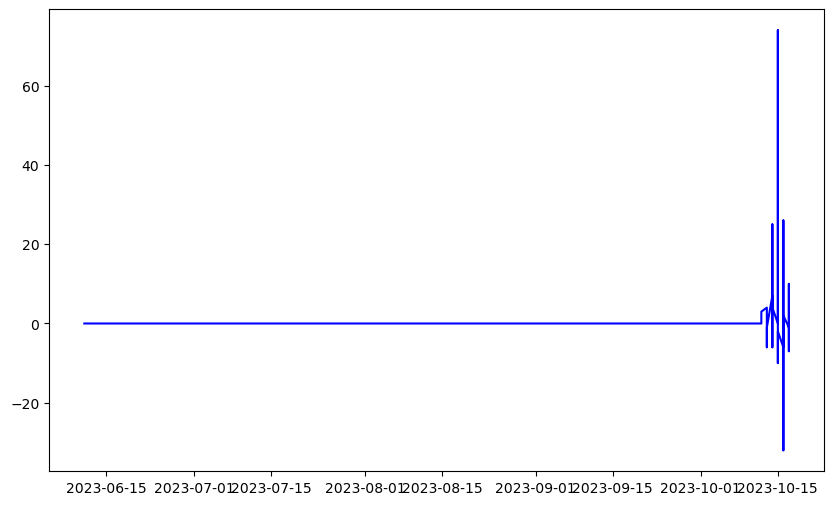

In [47]:
import matplotlib.pyplot as plt
df = df.sort_values(by='date')
plt.figure(figsize=(10, 6)) 
plt.plot(df['date'], df['sentiment'], color='b', label='Sentiment')

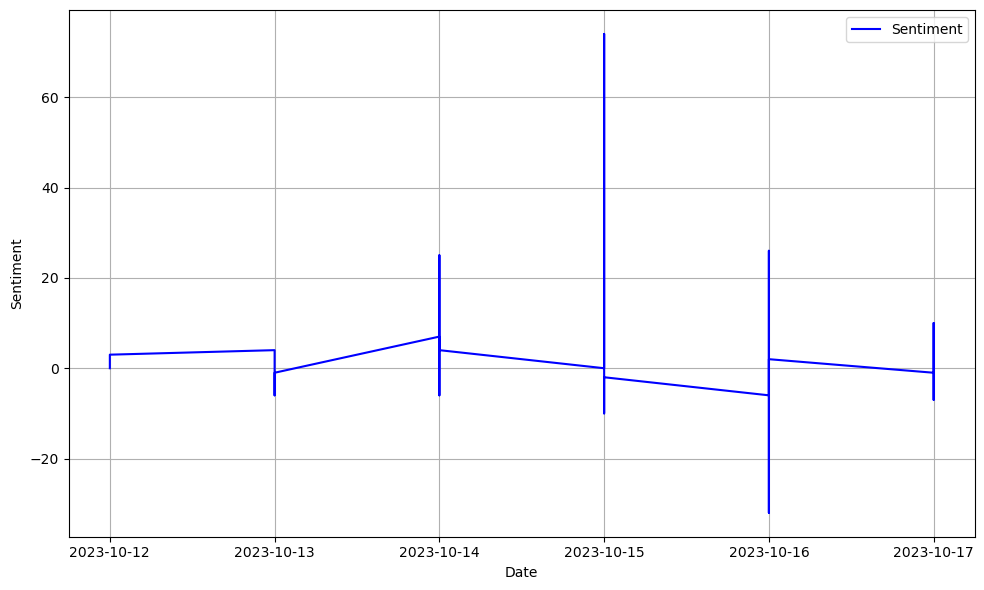

In [48]:
target_month = 10  # Replace with the month you want (e.g., 7 for July)

# Filter the DataFrame to include only data for the target month
target_data = df[df['date'].dt.month == target_month]

plt.figure(figsize=(10, 6))
plt.plot(target_data['date'], target_data['sentiment'], color='b', label='Sentiment')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

##### Calculating the sentiment for the post comments

In [49]:
for index, row in df.iterrows():
    text = row['tokenized_comments_no_stopwords']
    sentiment = computeSentiment(text, setPosWords, setNegWords)
    printColouredTokens(text, setPosWords, setNegWords, sentiment)
    df.loc[index, 'sentiment_comm'] = sentiment = sentiment


df.head()

success, finally, got, offer, 3, months, job, search, post, layoff, much, better, pay, title, bump, im, getting, deported, relieved, cries, visa, holders, faith, could, get, employer, sponsor, visa, find, another, one, : 1
accountant, company, work, paperless, gets, everything, available, servers, lots, civil, engineers, work, home, point, always, specific, profession, works, home, also, depends, company, setup, : 4
talk, supervisor, asinine, behavior, suggest, get, headset, headphones, respect, thing, hes, meeting, respect, everyone, else, getting, work, done, headhand, set, books, breakout, room, full, stop, : 2
job, replacing, hiring, someone, else, addition, different, things, : 0
would, apply, everywhere, entrylevel, job, right, lateral, move, necessarily, bad, thing, : 0
thought, work, utilize, business, assignment, would, continue, wouldnt, want, work, place, sees, source, free, labor, trick, : 2
20s, sooooooo, hard, even, early, 30s, youre, barely, established, juggling, life, 

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,...,tokenized_comments,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_comm
datetime,,,,,,,,,,,,,,,,,,,,,
2023-06-11 23:00:12,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...",...,"[success, i, finally, got, an, offer, 3, month...","[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[success, finally, got, offer, 3, months, job,...",2023-06-11,23:00:12,2023-06-11 23:00:12,0.0,0.0,1.0
2023-10-12 18:21:52,people working remote or wfh making 30hr whats...,Holasuphi,1086,1545,https://www.reddit.com/r/jobs/comments/176dpw3...,hi\n\nim looking for wfh jobs that pay 30hour ...,1.697135e+09,0.92,accountant but the company i work for is as a ...,"[people, working, remote, or, wfh, making, 30h...",...,"[accountant, but, the, company, i, work, for, ...","[people, working, remote, wfh, making, 30hr, w...","[hi, im, looking, wfh, jobs, pay, 30hour, incl...","[accountant, company, work, paperless, gets, e...",2023-10-12,18:21:52,2023-10-12 18:21:52,0.0,0.0,4.0
2023-10-12 18:03:12,coworker only uses speaker phone and expects u...,JoeJoe54,903,143,https://www.reddit.com/r/jobs/comments/176dabe...,so we used to be in separate cubicles but rece...,1.697134e+09,0.98,talk to the supervisor yours or his that is as...,"[coworker, only, uses, speaker, phone, and, ex...",...,"[talk, to, the, supervisor, yours, or, his, th...","[coworker, uses, speaker, phone, expects, us, ...","[used, separate, cubicles, recently, company, ...","[talk, supervisor, asinine, behavior, suggest,...",2023-10-12,18:03:12,2023-10-12 18:03:12,1.0,2.0,2.0
2023-10-12 21:50:16,my employer just posted my job,Weekly_Taro_8951,396,205,https://www.reddit.com/r/jobs/comments/176ikd2...,they posted my job yesterday and when hr was a...,1.697147e+09,0.93,is it your job as in they are replacing you or...,"[my, employer, just, posted, my, job]",...,"[is, it, your, job, as, in, they, are, replaci...","[employer, posted, job]","[posted, job, yesterday, hr, asked, today, shr...","[job, replacing, hiring, someone, else, additi...",2023-10-12,21:50:16,2023-10-12 21:50:16,0.0,3.0,0.0
2023-10-13 19:36:01,internal failure,Ok_Luck6374,5,5,https://www.reddit.com/r/jobs/comments/1776sbc...,rejected from 3 internal jobs\n\nive done 18 i...,1.697226e+09,1.00,i would apply everywhere\n\n if you are at an ...,"[internal, failure]",...,"[i, would, apply, everywhere, if, you, are, at...","[internal, failure]","[rejected, 3, internal, jobs, ive, done, 18, i...","[would, apply, everywhere, entrylevel, job, ri...",2023-10-13,19:36:01,2023-10-13 19:36:01,-1.0,4.0,0.0


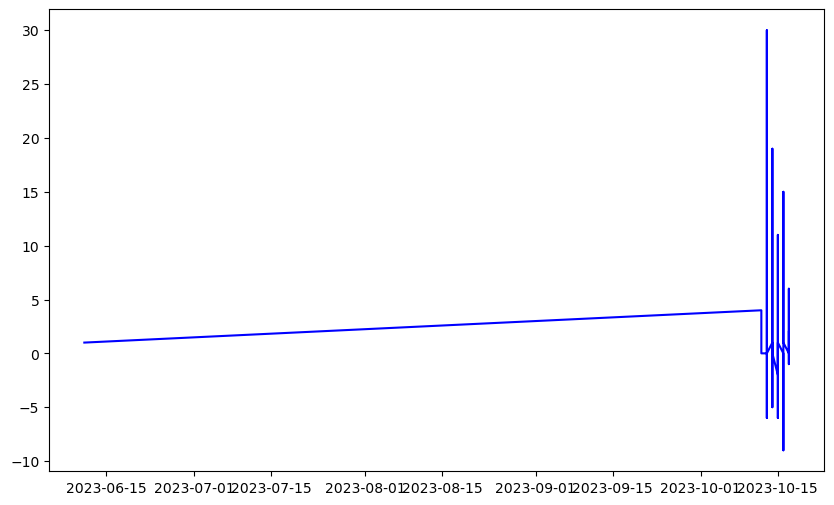

In [50]:
import matplotlib.pyplot as plt
df = df.sort_values(by='date')
plt.figure(figsize=(10, 6)) 
plt.plot(df['date'], df['sentiment_comm'], color='b', label='Sentiment')

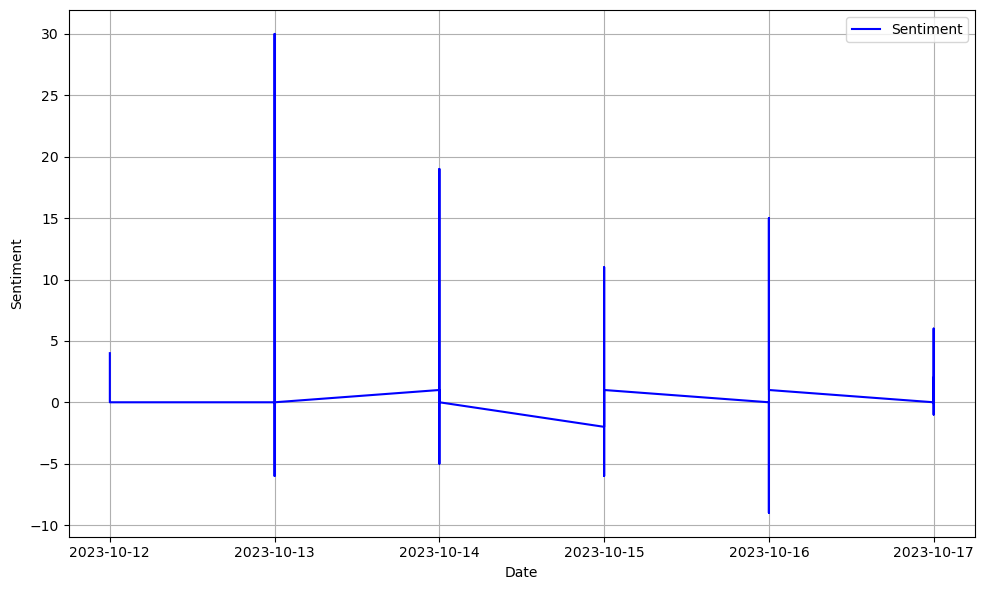

In [51]:
target_month = 10  # Replace with the month you want (e.g., 7 for July)

# Filter the DataFrame to include only data for the target month
target_data = df[df['date'].dt.month == target_month]

plt.figure(figsize=(10, 6))
plt.plot(target_data['date'], target_data['sentiment_comm'], color='b', label='Sentiment')

plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### Vader method

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def vaderPrintTokens(lTokens, dSentimentScores):

    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

In [53]:
def vaderSentimentAnalysis(postText, bPrint, tweetProcessor):

    sentAnalyser = SentimentIntensityAnalyzer()


    lSentiment = []
    lTokens = redditProcessor.process(postText)

    dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))
    lSentiment.append(dSentimentScores)

    if bPrint:
        vaderPrintTokens(lTokens, dSentimentScores)
                
                    
    return lSentiment

In [54]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
tweetTokenizer = TweetTokenizer()
lStopwords = stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '`']


redditProcessor = RedditProcessing.RedditProcessing(tweetTokenizer, lStopwords)
for index, row in df.iterrows():
    text = row['Title']
    sentiment = vaderSentimentAnalysis(text, bPrint=False, tweetProcessor=redditProcessor) 
    print(text, sentiment)
    df.loc[index, 'sentiment_title_vader'] = sentiment[0]['compound']


df.head()

success and disappointment megathread for the week [{'neg': 0.367, 'neu': 0.222, 'pos': 0.411, 'compound': 0.1027}]
people working remote or wfh making 30hr whats your job [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
coworker only uses speaker phone and expects us to be quiet [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
my employer just posted my job [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
how do i use this phone [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
im fucking exhausted cant see the light at the end [{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.4201}]
do you regret following your passion or do you regret not taking your chances on it [{'neg': 0.452, 'neu': 0.161, 'pos': 0.387, 'compound': -0.2023}]
got a rejection email past 3 am  [{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}]
ive lost almost every job ive had because of pmdd [{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.3182}]
im a medical 

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,...,tokenized_title_no_stopwords,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_comm,sentiment_title_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-06-11 23:00:12,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...",...,"[success, disappointment, megathread, week]","[weekly, success, disappointment, megathread, ...","[success, finally, got, offer, 3, months, job,...",2023-06-11,23:00:12,2023-06-11 23:00:12,0.0,0.0,1.0,0.1027
2023-10-12 18:21:52,people working remote or wfh making 30hr whats...,Holasuphi,1086,1545,https://www.reddit.com/r/jobs/comments/176dpw3...,hi\n\nim looking for wfh jobs that pay 30hour ...,1.697135e+09,0.92,accountant but the company i work for is as a ...,"[people, working, remote, or, wfh, making, 30h...",...,"[people, working, remote, wfh, making, 30hr, w...","[hi, im, looking, wfh, jobs, pay, 30hour, incl...","[accountant, company, work, paperless, gets, e...",2023-10-12,18:21:52,2023-10-12 18:21:52,0.0,0.0,4.0,0.0000
2023-10-12 18:03:12,coworker only uses speaker phone and expects u...,JoeJoe54,903,143,https://www.reddit.com/r/jobs/comments/176dabe...,so we used to be in separate cubicles but rece...,1.697134e+09,0.98,talk to the supervisor yours or his that is as...,"[coworker, only, uses, speaker, phone, and, ex...",...,"[coworker, uses, speaker, phone, expects, us, ...","[used, separate, cubicles, recently, company, ...","[talk, supervisor, asinine, behavior, suggest,...",2023-10-12,18:03:12,2023-10-12 18:03:12,1.0,2.0,2.0,0.0000
2023-10-12 21:50:16,my employer just posted my job,Weekly_Taro_8951,396,205,https://www.reddit.com/r/jobs/comments/176ikd2...,they posted my job yesterday and when hr was a...,1.697147e+09,0.93,is it your job as in they are replacing you or...,"[my, employer, just, posted, my, job]",...,"[employer, posted, job]","[posted, job, yesterday, hr, asked, today, shr...","[job, replacing, hiring, someone, else, additi...",2023-10-12,21:50:16,2023-10-12 21:50:16,0.0,3.0,0.0,0.0000
2023-10-13 16:06:39,how do i use this phone,Personal-Report-183,790,194,https://i.redd.it/hitebnl7uztb1.jpg,yall i started this job and i genuinely do not...,1.697213e+09,0.84,pick it up and dial 9 if you get a dial tone t...,"[how, do, i, use, this, phone]",...,"[use, phone]","[yall, started, job, genuinely, know, use, pho...","[pick, dial, 9, get, dial, tone, stutters, nor...",2023-10-13,16:06:39,2023-10-13 16:06:39,0.0,-1.0,0.0,0.0000


In [55]:
for index, row in df.iterrows():
    text = row['Self Text']

    sentiment = vaderSentimentAnalysis(text, bPrint=False, tweetProcessor=redditProcessor) 
    print(text, sentiment)
    df.loc[index, 'sentiment_text_vader'] = sentiment[0]['compound'] 

df.head()

 this is the weekly success and disappointment megathread for the week please post all of your successes and disappointments for this week including job offers and other victories as well as any venting of frustration in this thread and this thread only thanks [{'neg': 0.261, 'neu': 0.333, 'pos': 0.406, 'compound': 0.6369}]
hi

im looking for wfh jobs that pay 30hour including those that require degrees please share your jobs  [{'neg': 0.088, 'neu': 0.629, 'pos': 0.283, 'compound': 0.4767}]
so we used to be in separate cubicles but recently our company changed the layout and theres 5 of us sharing one small area we call them bull pens in my bull pen one of my coworkers only uses his speaker phone he never picks up the handset this wouldnt be too much of an issue except when he joins online meetings he still uses the speaker and expects everyone around him to be dead silent i have my own work to do and it usually involves discussing some matters with other coworkers myself and others in

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,...,tokenized_text_no_stopwords,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_comm,sentiment_title_vader,sentiment_text_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-06-11 23:00:12,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...",...,"[weekly, success, disappointment, megathread, ...","[success, finally, got, offer, 3, months, job,...",2023-06-11,23:00:12,2023-06-11 23:00:12,0.0,0.0,1.0,0.1027,0.6369
2023-10-12 18:21:52,people working remote or wfh making 30hr whats...,Holasuphi,1086,1545,https://www.reddit.com/r/jobs/comments/176dpw3...,hi\n\nim looking for wfh jobs that pay 30hour ...,1.697135e+09,0.92,accountant but the company i work for is as a ...,"[people, working, remote, or, wfh, making, 30h...",...,"[hi, im, looking, wfh, jobs, pay, 30hour, incl...","[accountant, company, work, paperless, gets, e...",2023-10-12,18:21:52,2023-10-12 18:21:52,0.0,0.0,4.0,0.0000,0.4767
2023-10-12 18:03:12,coworker only uses speaker phone and expects u...,JoeJoe54,903,143,https://www.reddit.com/r/jobs/comments/176dabe...,so we used to be in separate cubicles but rece...,1.697134e+09,0.98,talk to the supervisor yours or his that is as...,"[coworker, only, uses, speaker, phone, and, ex...",...,"[used, separate, cubicles, recently, company, ...","[talk, supervisor, asinine, behavior, suggest,...",2023-10-12,18:03:12,2023-10-12 18:03:12,1.0,2.0,2.0,0.0000,0.3612
2023-10-12 21:50:16,my employer just posted my job,Weekly_Taro_8951,396,205,https://www.reddit.com/r/jobs/comments/176ikd2...,they posted my job yesterday and when hr was a...,1.697147e+09,0.93,is it your job as in they are replacing you or...,"[my, employer, just, posted, my, job]",...,"[posted, job, yesterday, hr, asked, today, shr...","[job, replacing, hiring, someone, else, additi...",2023-10-12,21:50:16,2023-10-12 21:50:16,0.0,3.0,0.0,0.0000,0.8225
2023-10-13 16:06:39,how do i use this phone,Personal-Report-183,790,194,https://i.redd.it/hitebnl7uztb1.jpg,yall i started this job and i genuinely do not...,1.697213e+09,0.84,pick it up and dial 9 if you get a dial tone t...,"[how, do, i, use, this, phone]",...,"[yall, started, job, genuinely, know, use, pho...","[pick, dial, 9, get, dial, tone, stutters, nor...",2023-10-13,16:06:39,2023-10-13 16:06:39,0.0,-1.0,0.0,0.0000,0.3182


In [56]:
for index, row in df.iterrows():
    text = row['Top Comments']

    sentiment = vaderSentimentAnalysis(text, bPrint=False, tweetProcessor=redditProcessor) 
    print(text, sentiment)
    df.loc[index, 'sentiment_comm_vader'] = sentiment[0]['compound'] 

df.head()

success i finally got an offer 3 months into my job search post layoff much better pay and a title bump and im not getting deported i am so relieved cries

for all the visa holders out there have faith in yourself if you could get an employer to sponsor your visa once before you can find another one who will [{'neg': 0.102, 'neu': 0.599, 'pos': 0.299, 'compound': 0.836}]
accountant but the company i work for is as a paperless as it gets everything is available on the servers lots of civil engineers that work from home too my point being is that it is not always a specific profession that works from home it also depends on the company is setup [{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]
talk to the supervisor yours or his that is asinine behavior suggest they get him a headset or headphones
 
its a respect thing hes in the meeting he has to respect everyone else getting their work done headhand set or he books a breakout room full stop [{'neg': 0.072, 'neu': 0.724, 'pos': 0.

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,...,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_comm,sentiment_title_vader,sentiment_text_vader,sentiment_comm_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-06-11 23:00:12,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...",...,"[success, finally, got, offer, 3, months, job,...",2023-06-11,23:00:12,2023-06-11 23:00:12,0.0,0.0,1.0,0.1027,0.6369,0.8360
2023-10-12 18:21:52,people working remote or wfh making 30hr whats...,Holasuphi,1086,1545,https://www.reddit.com/r/jobs/comments/176dpw3...,hi\n\nim looking for wfh jobs that pay 30hour ...,1.697135e+09,0.92,accountant but the company i work for is as a ...,"[people, working, remote, or, wfh, making, 30h...",...,"[accountant, company, work, paperless, gets, e...",2023-10-12,18:21:52,2023-10-12 18:21:52,0.0,0.0,4.0,0.0000,0.4767,0.0000
2023-10-12 18:03:12,coworker only uses speaker phone and expects u...,JoeJoe54,903,143,https://www.reddit.com/r/jobs/comments/176dabe...,so we used to be in separate cubicles but rece...,1.697134e+09,0.98,talk to the supervisor yours or his that is as...,"[coworker, only, uses, speaker, phone, and, ex...",...,"[talk, supervisor, asinine, behavior, suggest,...",2023-10-12,18:03:12,2023-10-12 18:03:12,1.0,2.0,2.0,0.0000,0.3612,0.6124
2023-10-12 21:50:16,my employer just posted my job,Weekly_Taro_8951,396,205,https://www.reddit.com/r/jobs/comments/176ikd2...,they posted my job yesterday and when hr was a...,1.697147e+09,0.93,is it your job as in they are replacing you or...,"[my, employer, just, posted, my, job]",...,"[job, replacing, hiring, someone, else, additi...",2023-10-12,21:50:16,2023-10-12 21:50:16,0.0,3.0,0.0,0.0000,0.8225,0.0000
2023-10-13 16:06:39,how do i use this phone,Personal-Report-183,790,194,https://i.redd.it/hitebnl7uztb1.jpg,yall i started this job and i genuinely do not...,1.697213e+09,0.84,pick it up and dial 9 if you get a dial tone t...,"[how, do, i, use, this, phone]",...,"[pick, dial, 9, get, dial, tone, stutters, nor...",2023-10-13,16:06:39,2023-10-13 16:06:39,0.0,-1.0,0.0,0.0000,0.3182,-0.0772


In [57]:
df.head()

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,...,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_comm,sentiment_title_vader,sentiment_text_vader,sentiment_comm_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-06-11 23:00:12,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...",...,"[success, finally, got, offer, 3, months, job,...",2023-06-11,23:00:12,2023-06-11 23:00:12,0.0,0.0,1.0,0.1027,0.6369,0.8360
2023-10-12 18:21:52,people working remote or wfh making 30hr whats...,Holasuphi,1086,1545,https://www.reddit.com/r/jobs/comments/176dpw3...,hi\n\nim looking for wfh jobs that pay 30hour ...,1.697135e+09,0.92,accountant but the company i work for is as a ...,"[people, working, remote, or, wfh, making, 30h...",...,"[accountant, company, work, paperless, gets, e...",2023-10-12,18:21:52,2023-10-12 18:21:52,0.0,0.0,4.0,0.0000,0.4767,0.0000
2023-10-12 18:03:12,coworker only uses speaker phone and expects u...,JoeJoe54,903,143,https://www.reddit.com/r/jobs/comments/176dabe...,so we used to be in separate cubicles but rece...,1.697134e+09,0.98,talk to the supervisor yours or his that is as...,"[coworker, only, uses, speaker, phone, and, ex...",...,"[talk, supervisor, asinine, behavior, suggest,...",2023-10-12,18:03:12,2023-10-12 18:03:12,1.0,2.0,2.0,0.0000,0.3612,0.6124
2023-10-12 21:50:16,my employer just posted my job,Weekly_Taro_8951,396,205,https://www.reddit.com/r/jobs/comments/176ikd2...,they posted my job yesterday and when hr was a...,1.697147e+09,0.93,is it your job as in they are replacing you or...,"[my, employer, just, posted, my, job]",...,"[job, replacing, hiring, someone, else, additi...",2023-10-12,21:50:16,2023-10-12 21:50:16,0.0,3.0,0.0,0.0000,0.8225,0.0000
2023-10-13 16:06:39,how do i use this phone,Personal-Report-183,790,194,https://i.redd.it/hitebnl7uztb1.jpg,yall i started this job and i genuinely do not...,1.697213e+09,0.84,pick it up and dial 9 if you get a dial tone t...,"[how, do, i, use, this, phone]",...,"[pick, dial, 9, get, dial, tone, stutters, nor...",2023-10-13,16:06:39,2023-10-13 16:06:39,0.0,-1.0,0.0,0.0000,0.3182,-0.0772


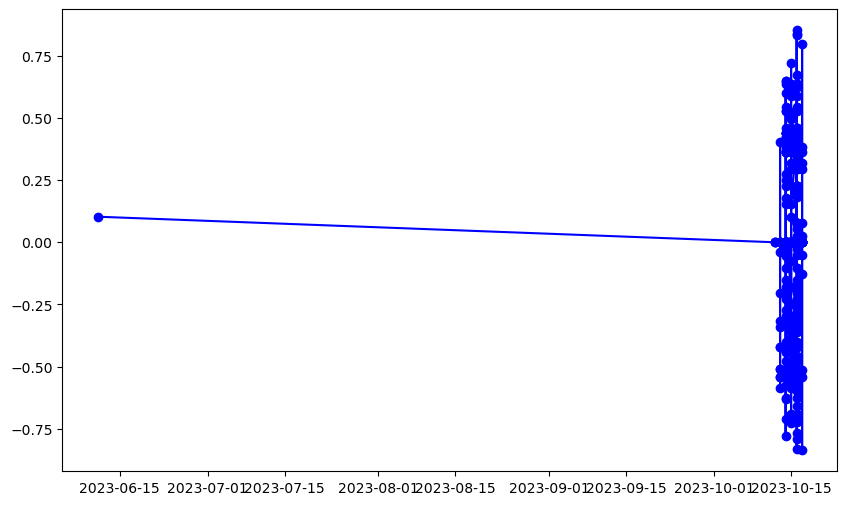

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sentiment_title_vader'], marker='o', linestyle='-', color='b', label='Sentiment')


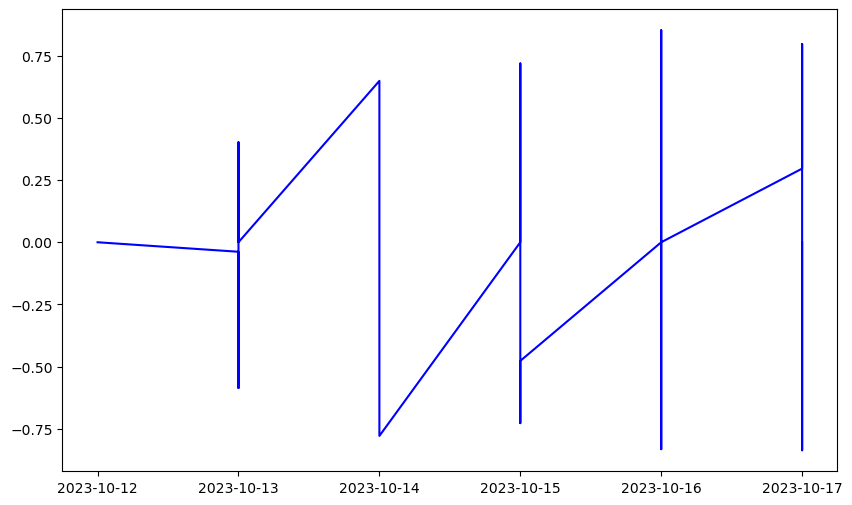

In [59]:
df_2023 = df[df['datetime'].dt.year == 2023]
month = [9,10]
df_02_2023 = df_2023[df_2023['datetime'].dt.month.isin(month)]
df_02_2023 = df_02_2023.sort_values(by='date')
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_02_2023['date'], df_02_2023['sentiment_title_vader'], color='b', label='Sentiment')

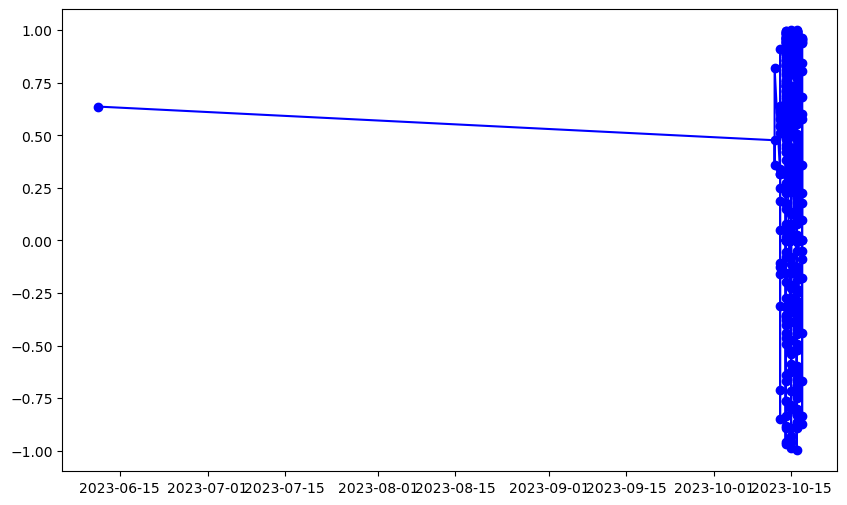

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sentiment_text_vader'], marker='o', linestyle='-', color='b', label='Sentiment')

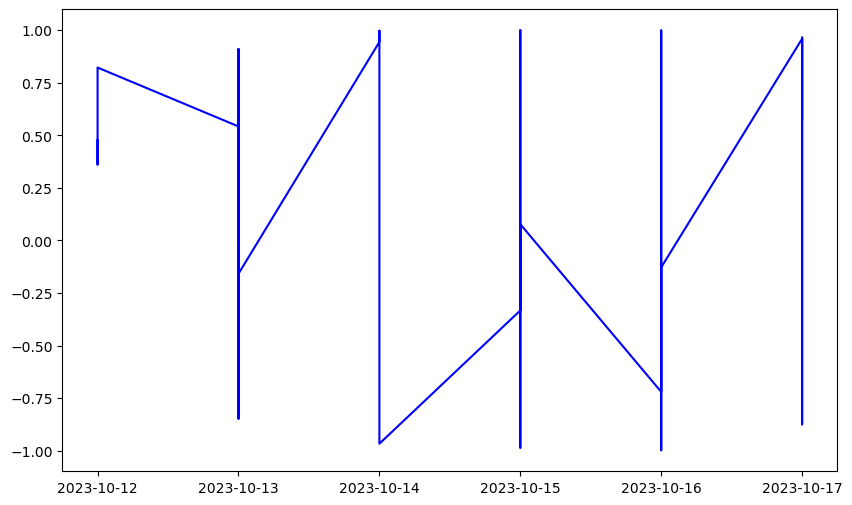

In [61]:
df_2023 = df[df['datetime'].dt.year == 2023]
month = [9,10]
df_02_2023 = df_2023[df_2023['datetime'].dt.month.isin(month)]
df_02_2023 = df_02_2023.sort_values(by='date')
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_02_2023['date'], df_02_2023['sentiment_text_vader'], color='b', label='Sentiment')

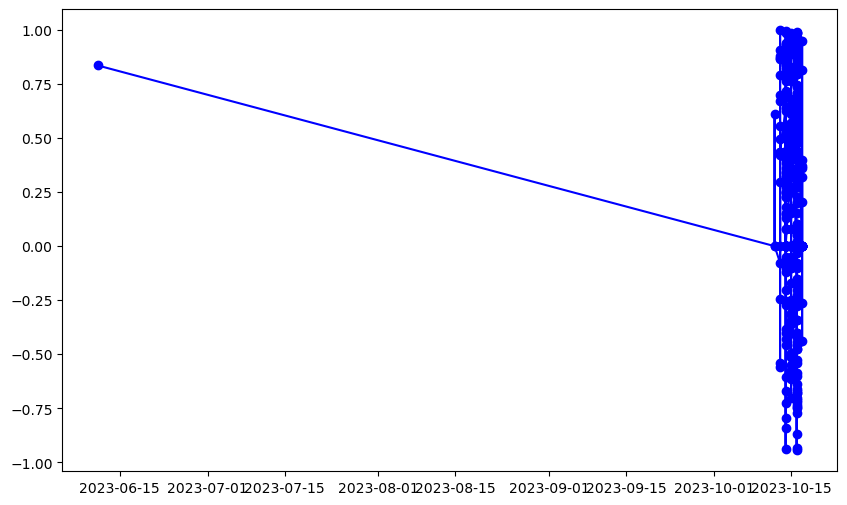

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['sentiment_comm_vader'], marker='o', linestyle='-', color='b', label='Sentiment')

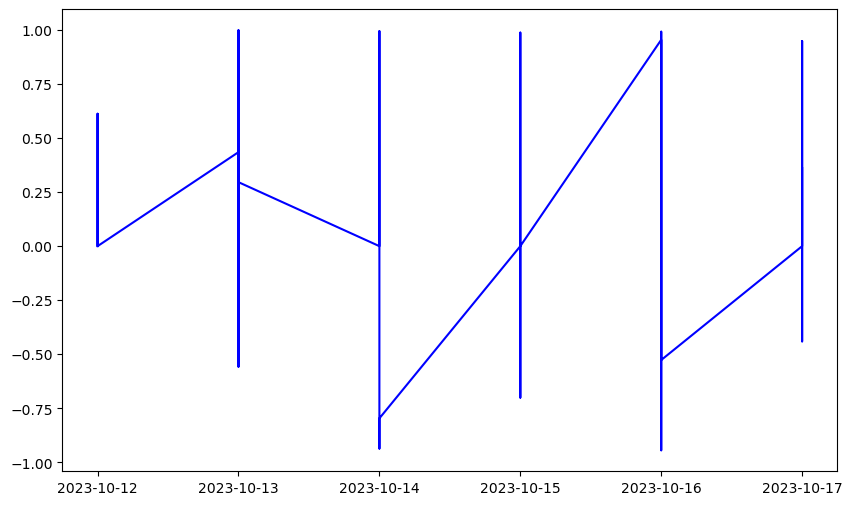

In [63]:
df_2023 = df[df['datetime'].dt.year == 2023]
month = [9,10]
df_02_2023 = df_2023[df_2023['datetime'].dt.month.isin(month)]
df_02_2023 = df_02_2023.sort_values(by='date')
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_02_2023['date'], df_02_2023['sentiment_comm_vader'], color='b', label='Sentiment')

In [64]:
df_2023 = df[(df['datetime'].dt.year == 2023) & (df['datetime'].dt.month == 10) & (df['datetime'].dt.day == 16)]
df_2023

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,...,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_comm,sentiment_title_vader,sentiment_text_vader,sentiment_comm_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-16 16:02:29,uk law graduate vac scheme training contract help,Manuu__eela,1,0,https://www.reddit.com/r/jobs/comments/1799gnz...,hi guys this is quite random and i know as a c...,1.697472e+09,1.00,,"[uk, law, graduate, vac, scheme, training, con...",...,[],2023-10-16,16:02:29,2023-10-16 16:02:29,0.0,5.0,0.0,0.4019,0.9315,0.0000
2023-10-16 21:21:32,is oakland search a legit recruiting company,clorox-peach,1,1,https://www.reddit.com/r/jobs/comments/179h48k...,they currently have a linkedin post for an ent...,1.697491e+09,1.00,if its real they added a 0 by mistake,"[is, oakland, search, a, legit, recruiting, co...",...,"[real, added, 0, mistake]",2023-10-16,21:21:32,2023-10-16 21:21:32,0.0,0.0,-1.0,0.0000,-0.3089,-0.3400
2023-10-16 21:16:01,i need a side job,Fun_Many827,1,2,https://www.reddit.com/r/jobs/comments/179gzcm...,i need a job that isnt very hard some thing i ...,1.697491e+09,0.99,chat support jobs is an option,"[i, need, a, side, job]",...,"[chat, support, jobs, option]",2023-10-16,21:16:01,2023-10-16 21:16:01,0.0,-1.0,1.0,0.0000,-0.1326,0.4019
2023-10-16 21:15:15,go data entry route or post office for now,Wise-Type2857,1,0,https://www.reddit.com/r/jobs/comments/179gyof...,so im at a weird crossroads right now and i fi...,1.697491e+09,1.00,,"[go, data, entry, route, or, post, office, for...",...,[],2023-10-16,21:15:15,2023-10-16 21:15:15,0.0,2.0,0.0,0.0000,0.5994,0.0000
2023-10-16 12:24:20,aita ex employer asking for help,neonpatronus,5,4,https://www.reddit.com/r/jobs/comments/1794r4r...,for a bit of context i had a very good working...,1.697459e+09,0.86,youre not at fault for anything and shouldnt f...,"[aita, ex, employer, asking, for, help]",...,"[youre, fault, anything, shouldnt, feel, guilt...",2023-10-16,12:24:20,2023-10-16 12:24:20,0.0,6.0,0.0,0.4019,0.9656,0.3058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16 06:19:12,economics major starting out salary,Unfair-Concert8735,2,1,https://www.reddit.com/r/jobs/comments/178zf6e...,hello i am currently attending ut and was wond...,1.697437e+09,1.00,you can look up this info on the department of...,"[economics, major, starting, out, salary]",...,"[look, info, department, labor]",2023-10-16,06:19:12,2023-10-16 06:19:12,0.0,1.0,0.0,0.0000,0.6369,0.0000
2023-10-16 10:23:28,today is bosss day,brad2060,1,0,https://www.reddit.com/r/jobs/comments/1792sn7...,just a reminder for those who have jobs and wa...,1.697452e+09,0.67,,"[today, is, bosss, day]",...,[],2023-10-16,10:23:28,2023-10-16 10:23:28,0.0,1.0,0.0,0.0000,0.4939,0.0000
2023-10-16 16:43:55,need help with jobs badly,Content_Parsnip641,1,1,https://www.reddit.com/r/jobs/comments/179agia...,i dont know what to do at this point ive been ...,1.697475e+09,1.00,its terrible but i would look at staffing agen...,"[need, help, with, jobs, badly]",...,"[terrible, would, look, staffing, agencies, gu...",2023-10-16,16:43:55,2023-10-16 16:43:55,-1.0,5.0,0.0,-0.1027,0.8979,-0.4215


In [65]:
df_2023 = df[(df['datetime'].dt.year == 2023) & (df['datetime'].dt.month == 10) & (df['datetime'].dt.day == 16)]
print("title:",df_2023.loc['2023-10-16 01:34:30']['Title'],"\ndate:",df_2023.loc['2023-10-16 01:34:30']['date'],"\nsentiment vader:",df_2023.loc['2023-10-16 01:34:30']["sentiment_title_vader"])


title: how do you deal with employers writing you up and out 
date: 2023-10-16 00:00:00 
sentiment vader: 0.0


In [66]:
df_2023.loc['2023-10-16 01:34:30']

Title                              how do you deal with employers writing you up ...
Author                                                                DonkeySmash101
Score                                                                              1
Number of Comments                                                                 1
URL                                https://www.reddit.com/r/jobs/comments/178ummc...
Self Text                          ive come back from a short term disability lea...
Timestamp                                                               1697420070.0
upvoteration                                                                     1.0
Top Comments                       they are professionally managing you out the d...
tokenized_title                    [how, do, you, deal, with, employers, writing,...
tokenized_text                     [ive, come, back, from, a, short, term, disabi...
tokenized_comments                 [they, are, professionally, ma

In [67]:
df.head()

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,...,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_comm,sentiment_title_vader,sentiment_text_vader,sentiment_comm_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-06-11 23:00:12,success and disappointment megathread for the ...,AutoModerator,91,300,https://www.reddit.com/r/jobs/comments/1478752...,this is the weekly success and disappointment...,1.686524e+09,1.00,success i finally got an offer 3 months into m...,"[success, and, disappointment, megathread, for...",...,"[success, finally, got, offer, 3, months, job,...",2023-06-11,23:00:12,2023-06-11 23:00:12,0.0,0.0,1.0,0.1027,0.6369,0.8360
2023-10-12 18:21:52,people working remote or wfh making 30hr whats...,Holasuphi,1086,1545,https://www.reddit.com/r/jobs/comments/176dpw3...,hi\n\nim looking for wfh jobs that pay 30hour ...,1.697135e+09,0.92,accountant but the company i work for is as a ...,"[people, working, remote, or, wfh, making, 30h...",...,"[accountant, company, work, paperless, gets, e...",2023-10-12,18:21:52,2023-10-12 18:21:52,0.0,0.0,4.0,0.0000,0.4767,0.0000
2023-10-12 18:03:12,coworker only uses speaker phone and expects u...,JoeJoe54,903,143,https://www.reddit.com/r/jobs/comments/176dabe...,so we used to be in separate cubicles but rece...,1.697134e+09,0.98,talk to the supervisor yours or his that is as...,"[coworker, only, uses, speaker, phone, and, ex...",...,"[talk, supervisor, asinine, behavior, suggest,...",2023-10-12,18:03:12,2023-10-12 18:03:12,1.0,2.0,2.0,0.0000,0.3612,0.6124
2023-10-12 21:50:16,my employer just posted my job,Weekly_Taro_8951,396,205,https://www.reddit.com/r/jobs/comments/176ikd2...,they posted my job yesterday and when hr was a...,1.697147e+09,0.93,is it your job as in they are replacing you or...,"[my, employer, just, posted, my, job]",...,"[job, replacing, hiring, someone, else, additi...",2023-10-12,21:50:16,2023-10-12 21:50:16,0.0,3.0,0.0,0.0000,0.8225,0.0000
2023-10-13 16:06:39,how do i use this phone,Personal-Report-183,790,194,https://i.redd.it/hitebnl7uztb1.jpg,yall i started this job and i genuinely do not...,1.697213e+09,0.84,pick it up and dial 9 if you get a dial tone t...,"[how, do, i, use, this, phone]",...,"[pick, dial, 9, get, dial, tone, stutters, nor...",2023-10-13,16:06:39,2023-10-13 16:06:39,0.0,-1.0,0.0,0.0000,0.3182,-0.0772


###  Top negative and top positive

In [68]:
top_negative_value = df['sentiment_title_vader'].min()


In [69]:
row_with_top_negative_value = df[df['sentiment_title_vader'] == df['sentiment_title_vader'].min()]
row_with_top_negative_value

,Title,Author,Score,Number of Comments,URL,Self Text,Timestamp,upvoteration,Top Comments,tokenized_title,...,tokenized_comments_no_stopwords,date,time,datetime,sentiment_title,sentiment,sentiment_comm,sentiment_title_vader,sentiment_text_vader,sentiment_comm_vader
datetime,,,,,,,,,,,,,,,,,,,,,
2023-10-17 01:59:57,i confused the interview for the wrong dates i...,Low_Bodybuilder3065,2,1,https://www.reddit.com/r/jobs/comments/179n8go...,i thought the interview was today and i was fr...,1.697508e+09,1.0,no but i did show up like 4 hours late to a jo...,"[i, confused, the, interview, for, the, wrong,...",...,"[show, like, 4, hours, late, job, 10, reason, ...",2023-10-17,01:59:57,2023-10-17 01:59:57,-3.0,-1.0,0.0,-0.836,-0.6705,-0.2635


In [70]:
print("title:",row_with_top_negative_value.loc['2023-10-17 01:59:57']['Title'],"\ndate:",row_with_top_negative_value.loc['2023-10-17 01:59:57']['date'],"\nsentiment vader:",row_with_top_negative_value.loc['2023-10-17 01:59:57']["sentiment_title_vader"])
print("upvoteratio:",row_with_top_negative_value.loc['2023-10-17 01:59:57']['upvoteration'],"\nscore:",row_with_top_negative_value.loc['2023-10-17 01:59:57']['Score'])

title: i confused the interview for the wrong dates is this bad 
date: 2023-10-17 00:00:00 
sentiment vader: -0.836
upvoteratio: 1.0 
score: 2


### Topic modelling

In [71]:
import pyLDAvis
import pyLDAvis.lda_model
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [72]:
lPosts = []
for j in df['tokenized_title_no_stopwords']:
    lPosts.append(' '.join(j))

In [73]:
lPosts

['success disappointment megathread week',
 'people working remote wfh making 30hr whats job',
 'coworker uses speaker phone expects us quiet',
 'employer posted job',
 'use phone',
 'im fucking exhausted cant see light end',
 'regret following passion regret taking chances',
 'got rejection email past 3',
 'ive lost almost every job ive pmdd',
 'im medical lab scientist im working restaurant',
 'doomed fail preemployment drug screen whats best course action',
 'figure career path right',
 'advice received offer employment hr person asking supervisor references',
 'officially call rest year unemployed',
 'got put pip im supposed close condo monday help',
 'messed resign',
 'anybody ever rejected didnt car',
 'consider breaking point job amount discomfort think tolerable',
 'got payed less dont know file claim',
 'doesnt get better',
 'company interviewing wants one assignment',
 'internal failure',
 'landed job 15 years 600 applications 20 interviews dont lose hope',
 'many applicants 

In [74]:
topicNum = 3
wordNumToDisplay = 3
featureNum = 1500

In [75]:
tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
tf = tfVectorizer.fit_transform(lPosts)
tfFeatureNames = tfVectorizer.get_feature_names_out()
ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)

In [76]:
def display_topics(model, featureNames, numTopWords):
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

In [77]:
display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

Topic 0:
working bad career
Topic 1:
job jobs need
Topic 2:
job looking work


In [78]:
panel = pyLDAvis.lda_model.prepare(ldaModel, tf, tfVectorizer, mds='tsne')
pyLDAvis.display(panel)

C:\Users\ANJANA\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [85]:
# Define a list of keywords related to job displacement due to AI
keywords = ["unemployment"]

# Filter the DataFrame based on the keywords
filtered_df = df[df['Title'].str.contains('|'.join(keywords), case=False) | df['Self Text'].str.contains('|'.join(keywords), case=False)]

# Show the filtered DataFrame
print(filtered_df)





                                                                 Title  \
datetime                                                                 
2023-10-13 18:12:27  landed a job after 15 years 600 applications a...   
2023-10-14 05:20:34  unemployed  just keep applying and keep your h...   
2023-10-14 15:14:41  was made redundant 4 months ago and still not ...   
2023-10-15 16:15:43         unlimited pto and putting in 2 week notice   
2023-10-15 05:22:58  need to quit my current toxic miserable job ca...   
2023-10-15 20:33:17        my parents think remote job  not a real job   
2023-10-16 17:47:29                thats flipping it unemployment rant   
2023-10-16 01:54:29  questions for parents who have been away from ...   

                                   Author  Score  Number of Comments  \
datetime                                                               
2023-10-13 18:12:27             SoCoolSam    834                 168   
2023-10-14 05:20:34            Ok-Gift371  

### Wordcloud

In [152]:
import numpy as np
import math
def displayWordcloud(model, featureNames):

    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]    
    topicNum = len(model.components_)
    plotColNum = 3
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='black')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\ANJANA\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecate

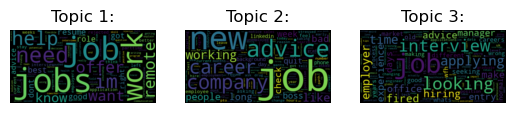

In [153]:
displayWordcloud(ldaModel, tfFeatureNames)

### Subsetting posts(title) for each topic and finding the maximum sentiment

#### Topic 1

In [228]:
topic_1 = ['climate', 'change', 'scientists']
mask = df['tokenized_title_no_stopwords'].apply(lambda x: all(keyword in x for keyword in topic_1))

In [229]:
mask

0      False
1      False
674    False
673    False
675    False
       ...  
4      False
10     False
6      False
7      False
3      False
Name: tokenized_title_no_stopwords, Length: 677, dtype: bool

In [230]:
df_topic1 = df[mask]

In [231]:
df_topic1

,title,author,score,Number of comments,self text,timestamp,upvoteratio,comments,tokenized_title,tokenized_text,tokenized_title_no_stopwords,tokenized_text_no_stopwords,datetime,date,time,sentiment_title,sentiment,sentiment_title_vader,sentiment_text_vader
534,so what specifically is wrong with the methodo...,FableLionhead,3,38,,1.687058e+09,0.58,"[{'author': 'GoblinCorp', 'score': 20, 'body':...","[so, what, specifically, is, wrong, with, the,...",[],"[specifically, wrong, methodology, hte, 4, sci...",[],2023-06-18 03:12:45,2023-06-18,03:12:45,-2.0,0.0,-0.6705,0.0000
191,is it true that scientists are contradictory a...,graciebeeapc,57,185,my uncle constantly posts climate change denia...,1.691331e+09,0.79,"[{'author': 'juiceboxheero', 'score': 78, 'bod...","[is, it, true, that, scientists, are, contradi...","[my, uncle, constantly, posts, climate, change...","[true, scientists, contradictory, climate, cha...","[uncle, constantly, posts, climate, change, de...",2023-08-06 14:12:11,2023-08-06,14:12:11,-1.0,-2.0,0.1027,-0.2023
179,climate change antarctica could become planets...,boppinmule,46,38,,1.691485e+09,1.00,"[{'author': 'IWanttoBuyAnArgument', 'score': 1...","[climate, change, antarctica, could, become, p...",[],"[climate, change, antarctica, could, become, p...",[],2023-08-08 08:50:47,2023-08-08,08:50:47,-1.0,0.0,-0.4939,0.0000
101,this summer is what climate change looks like ...,AmbassadorUnusual250,41,17,,1.692281e+09,0.94,"[{'author': 'sortinousn', 'score': 13, 'body':...","[this, summer, is, what, climate, change, look...",[],"[summer, climate, change, looks, like, scienti...",[],2023-08-17 14:07:47,2023-08-17,14:07:47,1.0,0.0,0.3612,0.0000
69,there are complex reasons for our dire wildfir...,boppinmule,26,139,,1.692595e+09,0.87,"[{'author': 'AmbitiousNoodle', 'score': 10, 'b...","[there, are, complex, reasons, for, our, dire,...",[],"[complex, reasons, dire, wildfires, scientists...",[],2023-08-21 05:18:46,2023-08-21,05:18:46,-2.0,0.0,-0.2500,0.0000


In [232]:
index = df_topic1['sentiment_title_vader'].idxmax()
print(df_topic1.loc[index]['title'],'\nSentiment:',df_topic1.loc[index]['sentiment_title_vader'])

this summer is what climate change looks like scientists say 
Sentiment: 0.3612


In [233]:
index = df_topic1['sentiment_title_vader'].idxmin()
print(df_topic1.loc[index]['title'],'\nSentiment:',df_topic1.loc[index]['sentiment_title_vader'])

so what specifically is wrong with the methodology of hte 4 of scientists who deny anthropogenic climate change 
Sentiment: -0.6705


(array([19523., 19530., 19539., 19546., 19553., 19560., 19570., 19577.,
        19584., 19591.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

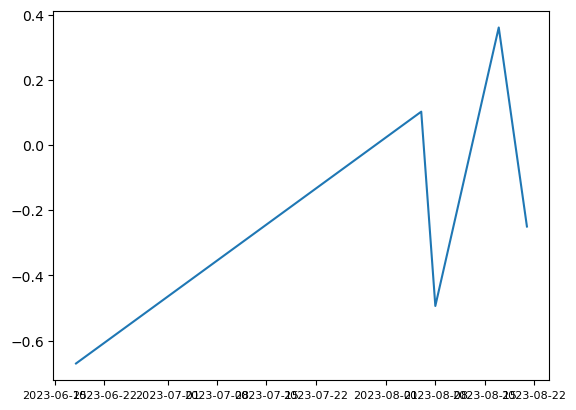

In [203]:
plt.plot(df_topic1['date'],df_topic1['sentiment_title_vader'])
plt.xticks(fontsize=8)

#### Topic 2

In [204]:
topic_2 = ['warming','global','new']
mask = df['tokenized_title_no_stopwords'].apply(lambda x: all(keyword in x for keyword in topic_2))

In [205]:
df_topic2 = df[mask]

In [206]:
index = df_topic2['sentiment_title_vader'].idxmax()
df_topic2.loc[index]
print(df_topic2.loc[index]['title'],'\nSentiment:',df_topic2.loc[index]['sentiment_title_vader'])

new measurements suggest tropical cyclones may influence global climate  scripps researchers find that tropical cyclones cause deeper and longer lasting ocean warming than previously thought setting the stage for unexpected and far reaching implications 
Sentiment: 0.34


In [207]:
index = df_topic2['sentiment_title_vader'].idxmin()
df_topic2.loc[index]
print(df_topic2.loc[index]['title'],'\nSentiment:',df_topic2.loc[index]['sentiment_title_vader'])

global warming and its effect on the food we eat  nbc new york 
Sentiment: 0.1531


(array([19543., 19547., 19551., 19555., 19559., 19563., 19567.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

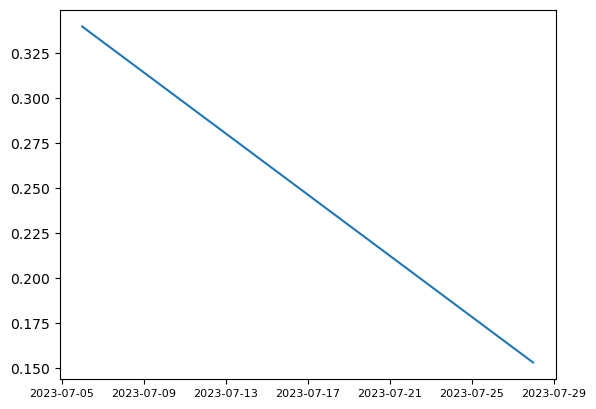

In [208]:
plt.plot(df_topic2['date'],df_topic2['sentiment_title_vader'])
plt.xticks(fontsize=8)

#### Topic 3

In [209]:
topic_3 = ['heat','extreme','ice']
mask = df['tokenized_title_no_stopwords'].apply(lambda x: any(keyword in x for keyword in topic_3))

In [210]:
df_topic3 = df[mask]

In [211]:
index = df_topic3['sentiment_title_vader'].idxmax()
df_topic3.loc[index]
print(df_topic3.loc[index]['title'],'\nSentiment:',df_topic3.loc[index]['sentiment_title_vader'])

video historic heat expected from gulf coast to great lakes tropical systems in atlantic 
Sentiment: 0.6249


In [212]:
index = df_topic3['sentiment_title_vader'].idxmin()
df_topic3.loc[index]
print(df_topic3.loc[index]['title'],'\nSentiment:',df_topic3.loc[index]['sentiment_title_vader'])

a war for water europe sounds the alarm on water stress ahead of another extreme summer 
Sentiment: -0.8442


(array([19509., 19523., 19539., 19553., 19570., 19584.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

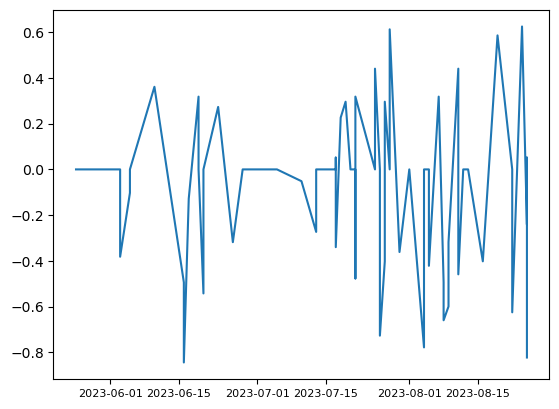

In [213]:
plt.plot(df_topic3['date'],df_topic3['sentiment_title_vader'])
plt.xticks(fontsize=8)

### Subsetting posts(content) for each topic and finding the maximum sentiment

#### Topic 1

In [214]:
topic_1 = ['climate', 'change', 'scientists']
mask = df['tokenized_text_no_stopwords'].apply(lambda x: all(keyword in x for keyword in topic_1))
df_topic1 = df[mask]

In [215]:
index = df_topic1['sentiment_text_vader'].idxmin()
print("\033[1m",df_topic1.loc[index]['title'],"\033[0m")
print(df_topic1.loc[index]['self text'],'\nSentiment:',df_topic1.loc[index]['sentiment_text_vader'])

 a lot of climate change skeptics these days as hyperbolic these days as actual climate alarmist 
and by climate alarmistsi dont mean people who soberly explain the real risks we are facing due to climate changei am talking about buffoons who think the world is ending because of it that having kids is immoral because of climate change or that basic shit needs to be banned 

but many climate skeptics have become their mirror image in terms of ridiculous hyperbole on some level they seem to get that outright denying climate change is just untenable but they constantly assert this false dichotomy to anyone who raises climate concerns with well i guess you just want to force everyone to deindustrialize and ruin the economy or make people in the third world starve or you wanna murder billions of people to reduce co2 or china and india pollute the most technically not true for india and the us is basically not polluting much at all or exaggerating how orthodox and unquestioning climate resea

In [216]:
index = df_topic1['sentiment_text_vader'].idxmin()
print("\033[1m",df_topic1.loc[index]['title'],"\033[0m")
print(df_topic1.loc[index]['self text'],'\nSentiment:',df_topic1.loc[index]['sentiment_text_vader'])

 a lot of climate change skeptics these days as hyperbolic these days as actual climate alarmist 
and by climate alarmistsi dont mean people who soberly explain the real risks we are facing due to climate changei am talking about buffoons who think the world is ending because of it that having kids is immoral because of climate change or that basic shit needs to be banned 

but many climate skeptics have become their mirror image in terms of ridiculous hyperbole on some level they seem to get that outright denying climate change is just untenable but they constantly assert this false dichotomy to anyone who raises climate concerns with well i guess you just want to force everyone to deindustrialize and ruin the economy or make people in the third world starve or you wanna murder billions of people to reduce co2 or china and india pollute the most technically not true for india and the us is basically not polluting much at all or exaggerating how orthodox and unquestioning climate resea

(array([19509., 19523., 19539., 19553., 19570., 19584.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

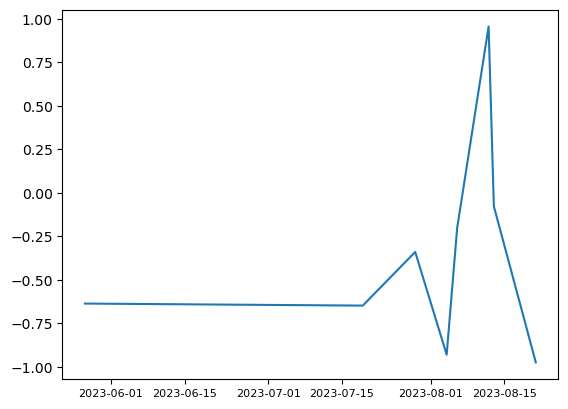

In [217]:
plt.plot(df_topic1['date'],df_topic1['sentiment_text_vader'])
plt.xticks(fontsize=8)

#### Topic 2

In [218]:
topic_2 = ['warming','global','new']
mask = df['tokenized_text_no_stopwords'].apply(lambda x: all(keyword in x for keyword in topic_2))
df_topic2 = df[mask]

In [219]:
index = df_topic2['sentiment_text_vader'].idxmax()
print("\033[1m",df_topic2.loc[index]['title'],"\033[0m")
print(df_topic2.loc[index]['self text'],'\nSentiment:',df_topic2.loc[index]['sentiment_text_vader'])

 how to causally link weather events to increasing global average temps above baseline 
disclaimer i have been a skeptic for many years but i decided to actual dig into the scientific bases for global warming and climate change

i started with how global temperature is actually measured and compared over time its was easy to see that the global average temperature above baseline is increasing and that increase has accelerated since 2000 compelling cases were made that its was tied to industrialization and started at the industrial revolution

in graduate school i studied control theory and system dynamics you learn that everything has its own response time how long does it take something to react to a new stimulus so i asked myself how fast is the response time of the environment to pollution stimulus i read john stermans phd thesis feedback complexity in integrated climateeconomy models not a light read at all inspired by the world3 model he devised an economic model of the world coup

In [220]:
index = df_topic2['sentiment_text_vader'].idxmin()
print("\033[1m",df_topic2.loc[index]['title'],"\033[0m")
print(df_topic2.loc[index]['self text'],'\nSentiment:',df_topic2.loc[index]['sentiment_text_vader'])

 after amoc shutdown  ifwhen it does 
there are dire warnings about amoc shutdown and of course there is the day after tomorrow which is probably at least an exaggerated timeline

but im having a different feeling at the moment and that is that when the existing amoc shuts down something else will start up  a new circulation pattern  my impression is that one of the specific fears is that melting of the greenland glaciers will reduce the density of the north atlantic and prevent those waters from falling as they have been  i dont know how troubled alaskan  siberian glaciers are and if that part of the circulation pattern is in imminent danger also

as a forinstance if the falling water around greenland shuts down and europe gets colder might the surface water begin falling closer to europe  the point is that if some other circulation pattern starts up it may become persistent and reversing global warming by whatever means may not bring things back to the way they were

has anyone studi

(array([19569., 19570., 19572., 19574., 19576., 19578.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

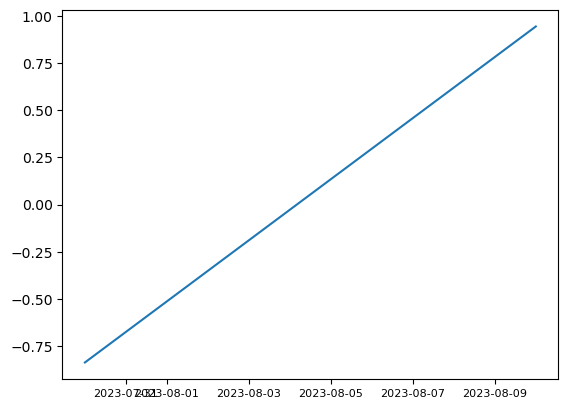

In [221]:
plt.plot(df_topic2['date'],df_topic2['sentiment_text_vader'])
plt.xticks(fontsize=8)

#### Topic 3

In [222]:
topic_3 = ['heat','extreme','ice']
mask = df['tokenized_text_no_stopwords'].apply(lambda x: any(keyword in x for keyword in topic_3))
df_topic3 = df[mask]

In [223]:
index = df_topic3['sentiment_text_vader'].idxmax()
print("\033[1m",df_topic3.loc[index]['title'],"\033[0m")
print(df_topic3.loc[index]['self text'],'\nSentiment:',df_topic3.loc[index]['sentiment_text_vader'])

 independent computer modeling 
hi all

im a chemical engineer very interested in making more impact than i already am im stamping engineer on a ev battery factory which is about as good as i can do as an individual would like to get some commercial or private equity loans to buy land and hire my ae firm or others to build a massive amount of solar in the us and abroad if anyone knows who to talk to reach out to me thanks 

i realize we cannot turn down fossil fuels until we have enough solar and batteries we are so close to the potential of making a huge difference i feel like the reasons we are not seeing progress we need is because old are too risk adverse to make the changes in rapid time 

i think sometimes people dont understand the severity of the problem the models are questioned too much seeding doubt  

what i would like to do it attempt to mathematically model basic heat transfer from the sun by latitude and add in atmospheric land and ocean temp gradients by latitude and se

In [224]:
index = df_topic3['sentiment_text_vader'].idxmin()
print("\033[1m",df_topic3.loc[index]['title'],"\033[0m")
print(df_topic3.loc[index]['self text'],'\nSentiment:',df_topic3.loc[index]['sentiment_text_vader'])

 my mom disproved climate change and idk what to do 
i dont remember every record she recited for me but basically heatwaves have been occurring for centuries the medieval warm period happened and now were coming out of the little ice age there were cases of heatwaves over 110 in the us northeast back in the 1800s and our record temps are the norm around the equator its called summer what are they gonna say when winter happens the whole climate change nonsense only happened when they found out that global warming is nonsense 

not one real scientist believes in it no meteorologist ever mentions it nobody can hand you statistics and scientific data to demonstrate proof of change 

moreso we have been here too briefly for climate change to be a measure of centuries of temps its virtually impossible for humans to affect the climate were too small and have been here too briefly

natgeo has had to retract a story about a polar bear dying because of climate change it actually had cancer they

(array([19509., 19523., 19539., 19553., 19570., 19584.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

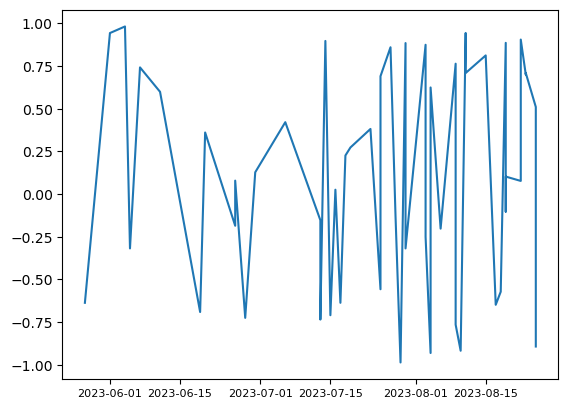

In [225]:
plt.plot(df_topic3['date'],df_topic3['sentiment_text_vader'])
plt.xticks(fontsize=8)

### Bi-grams

#### With tokenized title

In [94]:
from nltk import ngrams
from collections import Counter
all_tokens=[]
df['tokenized_title_no_stopwords'].apply(lambda x: all_tokens.append(x))

0      None
1      None
674    None
673    None
675    None
       ... 
4      None
10     None
6      None
7      None
3      None
Name: tokenized_title_no_stopwords, Length: 677, dtype: object

In [95]:
bigrams = [list(ngrams(tokens, 2)) for tokens in all_tokens]
flat_bigrams = [bigram for sublist in bigrams for bigram in sublist]
bigram_counter = Counter(flat_bigrams)
top_n = 10
top_bigrams = bigram_counter.most_common(top_n)


In [96]:
top_bigrams


[(('climate', 'change'), 122),
 (('global', 'warming'), 17),
 (('extreme', 'heat'), 14),
 (('sea', 'surface'), 7),
 (('sea', 'ice'), 6),
 (('surface', 'temperature'), 6),
 (('sq', 'mi'), 6),
 (('ice', 'age'), 5),
 (('north', 'atlantic'), 5),
 (('extreme', 'weather'), 5)]

#### With tokenized text 

In [97]:
all_tokens=[]
df['tokenized_text_no_stopwords'].apply(lambda x: all_tokens.append(x))

0      None
1      None
674    None
673    None
675    None
       ... 
4      None
10     None
6      None
7      None
3      None
Name: tokenized_text_no_stopwords, Length: 677, dtype: object

In [102]:
bigrams = [list(ngrams(tokens, 2)) for tokens in all_tokens]
flat_bigrams = [bigram for sublist in bigrams for bigram in sublist]
bigram_counter = Counter(flat_bigrams)
top_n = 30
top_bigrams = bigram_counter.most_common(top_n)


In [103]:
top_bigrams

[(('climate', 'change'), 191),
 (('global', 'warming'), 23),
 (('dont', 'know'), 16),
 (('seems', 'like'), 12),
 (('ive', 'seen'), 12),
 (('years', 'ago'), 12),
 (('feel', 'like'), 11),
 (('would', 'like'), 11),
 (('renewable', 'energy'), 10),
 (('climate', 'crisis'), 10),
 (('im', 'curious'), 8),
 (('id', 'like'), 8),
 (('look', 'like'), 8),
 (('many', 'people'), 8),
 (('dont', 'think'), 7),
 (('something', 'like'), 7),
 (('ive', 'read'), 7),
 (('climate', 'system'), 7),
 (('fossil', 'fuels'), 7),
 (('greenhouse', 'gases'), 7),
 (('make', 'sense'), 7),
 (('ice', 'age'), 7),
 (('flair', 'text'), 6),
 (('feel', 'free'), 6),
 (('im', 'trying'), 6),
 (('climate', 'science'), 6),
 (('10', 'years'), 6),
 (('anyone', 'know'), 6),
 (('global', 'temperature'), 6),
 (('dont', 'want'), 6)]

### Unigram

#### With tokenized title

In [98]:
all_tokens=[]
df['tokenized_title_no_stopwords'].apply(lambda x: all_tokens.append(x))

0      None
1      None
674    None
673    None
675    None
       ... 
4      None
10     None
6      None
7      None
3      None
Name: tokenized_title_no_stopwords, Length: 677, dtype: object

In [100]:
unigrams = [list(ngrams(tokens, 1)) for tokens in all_tokens]
flat_unigrams = [unigram for sublist in unigrams for unigram in sublist]
unigram_counter = Counter(flat_unigrams)
top_n = 10
top_unigrams = unigram_counter.most_common(top_n)
top_unigrams

[(('climate',), 195),
 (('change',), 129),
 (('heat',), 39),
 (('warming',), 36),
 (('global',), 35),
 (('could',), 32),
 (('new',), 29),
 (('extreme',), 29),
 (('ocean',), 26),
 (('temperature',), 24)]

#### With tokenized text

In [101]:
all_tokens=[]
df['tokenized_text_no_stopwords'].apply(lambda x: all_tokens.append(x))

0      None
1      None
674    None
673    None
675    None
       ... 
4      None
10     None
6      None
7      None
3      None
Name: tokenized_text_no_stopwords, Length: 677, dtype: object

In [101]:
unigrams = [list(ngrams(tokens, 1)) for tokens in all_tokens]
flat_unigrams = [unigram for sublist in unigrams for unigram in sublist]
unigram_counter = Counter(flat_unigrams)
top_n = 30
top_unigrams = unigram_counter.most_common(top_n)
top_unigrams

[(('climate',), 345),
 (('change',), 221),
 (('like',), 145),
 (('would',), 138),
 (('im',), 137),
 (('people',), 98),
 (('dont',), 87),
 (('know',), 84),
 (('years',), 77),
 (('think',), 76),
 (('get',), 68),
 (('ive',), 67),
 (('could',), 66),
 (('data',), 65),
 (('one',), 64),
 (('also',), 61),
 (('global',), 60),
 (('time',), 59),
 (('much',), 58),
 (('even',), 55),
 (('see',), 53),
 (('warming',), 52),
 (('world',), 52),
 (('make',), 50),
 (('temperature',), 50),
 (('want',), 50),
 (('really',), 49),
 (('carbon',), 49),
 (('many',), 47),
 (('help',), 47)]

In [194]:

subreddit = client.subreddit(sSubredditName)
top_post = subreddit.top(limit=1)  # You can change the time_filter if needed


# Print the comments
for post in top_post:
    # Retrieve the post's comments
    comments = post.comments

    # Print the comments
    for comment in comments:
        print(comment.body)

> Feeling scared? Have you been listening to or reading sources that make you think climate change will kill:
>
>
>- you?
>- your friends and family?
>- all of humanity?
>
>
>You aren't the only one.

Infomercial vibes.
So I know this is a late response to this thread but I hope some people see this.

&#x200B;

Reddit is for the most part not a great place for non-bias sources, as you can probably tell it is VERY bias towards a democrat viewpoint. Which I believe for the most part, is actually very logical. Most of the general viewpoints are realistic and good, but the specific information written in a headline as a hyperbole because of the bias. Imo this is actually pretty good, especially because it's scientifically backed. Because of this it makes people who were on the fence (much like myself and many others I know) about voting much clearer. But because of this going to Reddit for world news (specifically climate change) is the equivalent of using WebMD to diagnose yourself. There